<h1>Przegląd danych</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
database = pd.read_csv("ds_salaries.csv", usecols=["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "salary_in_usd", "employee_residence", "remote_ratio", "company_location", "company_size"])

In [3]:
database.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [4]:
database.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [5]:
database["salary_in_usd"].mean()

112297.86985172982

In [6]:
database["salary_in_usd"].median()

101570.0

In [7]:
database["salary_in_usd"].std()

70957.25941139569

In [8]:
database["salary_in_usd"].var()

5034932663.176102

<h1>Odrzucenie odstających danych</h1>

In [9]:
def reject_outliers(data, num_of_std):
    median = np.median(data["salary_in_usd"])
    standard_deviation = np.std(data["salary_in_usd"])
    for index, row in data.iterrows():
        if (row["salary_in_usd"] < (median - num_of_std * standard_deviation) or row["salary_in_usd"] > (median + num_of_std * standard_deviation)):
            data = data.drop(index)
    return data

In [10]:
#reject outliers
database = reject_outliers(database, 2)
database.describe()

,work_year,salary_in_usd,remote_ratio
count,588.000000,588.000000,588.000000
mean,2021.416667,104842.698980,70.833333
std,0.686840,55859.668866,40.698578
min,2020.000000,2859.000000,0.000000
25%,2021.000000,61788.750000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,144213.500000,100.000000
max,2022.000000,242000.000000,100.000000


<h1>Pomieszanie danych</h1>

In [11]:
database = database.sample(frac=1, random_state=71).reset_index()
database.drop("index", axis=1, inplace=True)
database.head(10)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,USD,147000,US,50,US,L
1,2022,MI,FT,Data Scientist,GBP,183228,GB,0,GB,M
2,2021,MI,FT,Data Scientist,BRL,12901,BR,0,BR,S
3,2021,MI,FT,Cloud Data Engineer,SGD,89294,SG,50,SG,L
4,2022,EX,FT,Head of Machine Learning,INR,79039,IN,50,IN,L
5,2020,SE,FT,Data Scientist,EUR,91237,AT,0,AT,S
6,2022,MI,FT,Data Scientist,USD,130000,US,0,US,M
7,2022,SE,FT,Data Analyst,USD,99050,US,100,US,M
8,2022,SE,FT,Data Engineer,USD,160000,US,0,US,L
9,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


<h1>Informacje o danych</h1>

In [12]:
database.count()

work_year             588
experience_level      588
employment_type       588
job_title             588
salary_currency       588
salary_in_usd         588
employee_residence    588
remote_ratio          588
company_location      588
company_size          588
dtype: int64

In [13]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
work_year             588 non-null int64
experience_level      588 non-null object
employment_type       588 non-null object
job_title             588 non-null object
salary_currency       588 non-null object
salary_in_usd         588 non-null int64
employee_residence    588 non-null object
remote_ratio          588 non-null int64
company_location      588 non-null object
company_size          588 non-null object
dtypes: int64(3), object(7)
memory usage: 46.0+ KB


In [14]:
database["work_year"].value_counts()

2022    312
2021    209
2020     67
Name: work_year, dtype: int64

<h1>Modyfikacja danych ze względu na doświadczenie pracownika</h1>

In [15]:
database["experience_level"].value_counts()

SE    271
MI    209
EN     87
EX     21
Name: experience_level, dtype: int64

In [16]:
isEX = database["experience_level"] == "EX"
database[isEX].describe()

,work_year,salary_in_usd,remote_ratio
count,21.000000,21.000000,21.000000
mean,2021.523810,155675.857143,78.571429
std,0.601585,55334.148754,33.806170
min,2020.000000,69741.000000,0.000000
25%,2021.000000,118187.000000,50.000000
50%,2022.000000,150000.000000,100.000000
75%,2022.000000,200000.000000,100.000000
max,2022.000000,242000.000000,100.000000


In [17]:
isEN = database["experience_level"] == "EN"
database[isEN].describe()

,work_year,salary_in_usd,remote_ratio
count,87.000000,87.000000,87.000000
mean,2021.022989,59478.298851,70.114943
std,0.681602,39706.457621,37.710471
min,2020.000000,4000.000000,0.000000
25%,2021.000000,26611.000000,50.000000
50%,2021.000000,55000.000000,100.000000
75%,2021.000000,83764.000000,100.000000
max,2022.000000,225000.000000,100.000000


In [18]:
isMI = database["experience_level"] == "MI"
database[isMI].describe()

,work_year,salary_in_usd,remote_ratio
count,209.000000,209.000000,209.000000
mean,2021.287081,82058.181818,63.875598
std,0.709737,46557.108590,42.729064
min,2020.000000,2859.000000,0.000000
25%,2021.000000,47282.000000,0.000000
50%,2021.000000,75774.000000,100.000000
75%,2022.000000,110000.000000,100.000000
max,2022.000000,241000.000000,100.000000


In [19]:
isSE = database["experience_level"] == "SE"
database[isSE].describe()

,work_year,salary_in_usd,remote_ratio
count,271.000000,271.000000,271.000000
mean,2021.634686,133038.900369,75.830258
std,0.592652,48177.295703,39.869611
min,2020.000000,18907.000000,0.000000
25%,2021.000000,99851.500000,50.000000
50%,2022.000000,132320.000000,100.000000
75%,2022.000000,165310.000000,100.000000
max,2022.000000,240000.000000,100.000000


In [20]:
database["experience_level"] = database["experience_level"].astype("category")

In [21]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
work_year             588 non-null int64
experience_level      588 non-null category
employment_type       588 non-null object
job_title             588 non-null object
salary_currency       588 non-null object
salary_in_usd         588 non-null int64
employee_residence    588 non-null object
remote_ratio          588 non-null int64
company_location      588 non-null object
company_size          588 non-null object
dtypes: category(1), int64(3), object(6)
memory usage: 42.2+ KB


<h1>Modyfikacja danych ze względu na typ zatrudnienia</h1>

In [22]:
database["employment_type"].value_counts()

FT    571
PT     10
FL      4
CT      3
Name: employment_type, dtype: int64

In [23]:
database["employment_type"] = database["employment_type"].astype("category")

In [24]:
database.drop("employment_type", axis=1, inplace=True)

In [25]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
work_year             588 non-null int64
experience_level      588 non-null category
job_title             588 non-null object
salary_currency       588 non-null object
salary_in_usd         588 non-null int64
employee_residence    588 non-null object
remote_ratio          588 non-null int64
company_location      588 non-null object
company_size          588 non-null object
dtypes: category(1), int64(3), object(5)
memory usage: 37.6+ KB


<h1>Modyfikacja danych ze względu na miejsce zamieszkania pracownika</h1>

In [26]:
database["employee_residence"].value_counts().head(30)

US    314
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
PT      6
JP      6
PK      6
BR      6
NL      5
PL      4
IT      4
RU      4
TR      3
AU      3
AT      3
AE      3
VN      3
HU      2
NG      2
SG      2
MX      2
DK      2
SI      2
BE      2
RO      2
BG      1
Name: employee_residence, dtype: int64

In [27]:
database["employee_residence"].nunique()

57

In [28]:
isEmployeeUS = database["employee_residence"] == "US"
database[isEmployeeUS].describe()

,work_year,salary_in_usd,remote_ratio
count,314.000000,314.000000,314.000000
mean,2021.614650,137818.939490,77.229299
std,0.609752,44709.269107,40.550898
min,2020.000000,25000.000000,0.000000
25%,2021.000000,105000.000000,62.500000
50%,2022.000000,135000.000000,100.000000
75%,2022.000000,166600.000000,100.000000
max,2022.000000,242000.000000,100.000000


In [29]:
isEmployeeGB = database["employee_residence"] == "GB"
database[isEmployeeGB].describe()

,work_year,salary_in_usd,remote_ratio
count,44.000000,44.000000,44.000000
mean,2021.590909,81403.159091,45.454545
std,0.622007,29932.837343,44.222195
min,2020.000000,37300.000000,0.000000
25%,2021.000000,55751.500000,0.000000
50%,2022.000000,78526.000000,50.000000
75%,2022.000000,103545.500000,100.000000
max,2022.000000,183228.000000,100.000000


In [30]:
isEmployeeIN = database["employee_residence"] == "IN"
database[isEmployeeIN].describe()

,work_year,salary_in_usd,remote_ratio
count,30.000000,30.000000,30.000000
mean,2021.033333,37322.333333,63.333333
std,0.556053,43741.188224,41.384099
min,2020.000000,5409.000000,0.000000
25%,2021.000000,16397.000000,50.000000
50%,2021.000000,22124.000000,75.000000
75%,2021.000000,38812.750000,100.000000
max,2022.000000,200000.000000,100.000000


In [31]:
isEmployeeCA = database["employee_residence"] == "CA"
database[isEmployeeCA].describe()

,work_year,salary_in_usd,remote_ratio
count,29.00000,29.000000,29.000000
mean,2021.62069,97085.310345,75.862069
std,0.56149,39767.443731,36.889530
min,2020.00000,52000.000000,0.000000
25%,2021.00000,70912.000000,50.000000
50%,2022.00000,85000.000000,100.000000
75%,2022.00000,117104.000000,100.000000
max,2022.00000,196979.000000,100.000000


In [32]:
isEmployeeDE = database["employee_residence"] == "DE"
database[isEmployeeDE].describe()

,work_year,salary_in_usd,remote_ratio
count,25.00,25.000000,25.000000
mean,2020.88,85552.560000,56.000000
std,0.60,39383.701013,36.285902
min,2020.00,15966.000000,0.000000
25%,2021.00,62726.000000,50.000000
50%,2021.00,79197.000000,50.000000
75%,2021.00,94564.000000,100.000000
max,2022.00,173762.000000,100.000000


In [33]:
isEmployeeFR = database["employee_residence"] == "FR"
database[isEmployeeFR].describe()

,work_year,salary_in_usd,remote_ratio
count,18.000000,18.000000,18.000000
mean,2020.833333,59886.611111,55.555556
std,0.707107,15848.687706,29.149154
min,2020.000000,36643.000000,0.000000
25%,2020.000000,49734.500000,50.000000
50%,2021.000000,57920.000000,50.000000
75%,2021.000000,69342.500000,50.000000
max,2022.000000,93427.000000,100.000000


In [34]:
isEmployeeES = database["employee_residence"] == "ES"
database[isEmployeeES].describe()

,work_year,salary_in_usd,remote_ratio
count,15.000000,15.000000,15.000000
mean,2021.200000,57593.400000,90.000000
std,0.774597,28395.033942,20.701967
min,2020.000000,10354.000000,50.000000
25%,2021.000000,41371.000000,100.000000
50%,2021.000000,49461.000000,100.000000
75%,2022.000000,71444.500000,100.000000
max,2022.000000,130800.000000,100.000000


In [35]:
isEmployeeGR = database["employee_residence"] == "GR"
database[isEmployeeGR].describe()

,work_year,salary_in_usd,remote_ratio
count,13.000000,13.000000,13.000000
mean,2021.538462,56331.230769,80.769231
std,0.776250,20631.677542,38.397382
min,2020.000000,20000.000000,0.000000
25%,2021.000000,43966.000000,100.000000
50%,2022.000000,54957.000000,100.000000
75%,2022.000000,68428.000000,100.000000
max,2022.000000,88654.000000,100.000000


In [36]:
database[isEmployeeGR | isEmployeeES].describe()

,work_year,salary_in_usd,remote_ratio
count,28.000000,28.000000,28.000000
mean,2021.357143,57007.392857,85.714286
std,0.780042,24650.880351,29.991180
min,2020.000000,10354.000000,0.000000
25%,2021.000000,43021.750000,100.000000
50%,2022.000000,52209.000000,100.000000
75%,2022.000000,70556.000000,100.000000
max,2022.000000,130800.000000,100.000000


In [37]:
isEmployeeJP = database["employee_residence"] == "JP" # merge with Canada
database[isEmployeeJP].describe()

,work_year,salary_in_usd,remote_ratio
count,6.000000,6.000000,6.000000
mean,2021.000000,77460.666667,58.333333
std,0.632456,47077.220511,37.638633
min,2020.000000,40000.000000,0.000000
25%,2021.000000,47194.500000,50.000000
50%,2021.000000,68855.500000,50.000000
75%,2021.000000,76523.000000,87.500000
max,2022.000000,168000.000000,100.000000


In [38]:
isEmployeePK = database["employee_residence"] == "PK" # merge with India
database[isEmployeePK].describe()

,work_year,salary_in_usd,remote_ratio
count,6.000000,6.000000,6.000000
mean,2021.000000,27462.833333,66.666667
std,0.894427,22766.222791,40.824829
min,2020.000000,8000.000000,0.000000
25%,2020.250000,12000.000000,50.000000
50%,2021.000000,16000.000000,75.000000
75%,2021.750000,46056.500000,100.000000
max,2022.000000,58035.000000,100.000000


In [39]:
isEmployeeBR = database["employee_residence"] == "BR"
database[isEmployeeBR].describe()

,work_year,salary_in_usd,remote_ratio
count,6.000000,6.000000,6.000000
mean,2021.166667,54634.666667,66.666667
std,0.408248,61537.353923,51.639778
min,2021.000000,12000.000000,0.000000
25%,2021.000000,14402.500000,25.000000
50%,2021.000000,21453.500000,100.000000
75%,2021.000000,81000.000000,100.000000
max,2022.000000,160000.000000,100.000000


In [40]:
isEmployeePT = database["employee_residence"] == "PT" # merge with Greece and Spain and Italy and Denmark
database[isEmployeePT].describe()

,work_year,salary_in_usd,remote_ratio
count,6.000000,6.000000,6.000000
mean,2021.166667,42862.500000,66.666667
std,0.983192,21443.783834,40.824829
min,2020.000000,10000.000000,0.000000
25%,2020.250000,29032.250000,50.000000
50%,2021.500000,53090.000000,75.000000
75%,2022.000000,57691.250000,100.000000
max,2022.000000,60757.000000,100.000000


In [41]:
isEmployeeNL = database["employee_residence"] == "NL" # merge with France
database[isEmployeeNL].describe()

,work_year,salary_in_usd,remote_ratio
count,5.000000,5.000000,5.00000
mean,2021.000000,60956.600000,90.00000
std,0.707107,17746.565479,22.36068
min,2020.000000,42000.000000,50.00000
25%,2021.000000,45391.000000,100.00000
50%,2021.000000,62651.000000,100.00000
75%,2021.000000,69741.000000,100.00000
max,2022.000000,85000.000000,100.00000


In [42]:
isEmployeeIT = database["employee_residence"] == "IT" # merge with Greece and Spain and Italy and Denmark
database[isEmployeeIT].describe()

,work_year,salary_in_usd,remote_ratio
count,4.00,4.000000,4.000000
mean,2020.75,61600.000000,50.000000
std,0.50,63014.243221,40.824829
min,2020.00,20000.000000,0.000000
25%,2020.75,21251.750000,37.500000
50%,2021.00,36366.500000,50.000000
75%,2021.00,76714.750000,62.500000
max,2021.00,153667.000000,100.000000


In [43]:
isEmployeePL = database["employee_residence"] == "PL" # merge with Brasil and Poland and Hungary and Romania and Portugal
database[isEmployeePL].describe()

,work_year,salary_in_usd,remote_ratio
count,4.000000,4.000000,4.0
mean,2021.000000,56177.500000,100.0
std,0.816497,39293.270285,0.0
min,2020.000000,28476.000000,100.0
25%,2020.750000,33811.500000,100.0
50%,2021.000000,41093.500000,100.0
75%,2021.250000,63459.500000,100.0
max,2022.000000,114047.000000,100.0


In [44]:
isEmployeeRU = database["employee_residence"] == "RU" # merge with Canada and Japan
database[isEmployeeRU].describe()

,work_year,salary_in_usd,remote_ratio
count,4.000000,4.000000,4.000000
mean,2021.000000,105750.000000,62.500000
std,0.816497,84255.069086,47.871355
min,2020.000000,48000.000000,0.000000
25%,2020.750000,57000.000000,37.500000
50%,2021.000000,72500.000000,75.000000
75%,2021.250000,121250.000000,100.000000
max,2022.000000,230000.000000,100.000000


In [45]:
database[isEmployeeRU]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
64,2022,MI,Data Scientist,USD,48000,RU,100,US,S
113,2021,EX,Head of Data Science,USD,85000,RU,0,RU,M
135,2020,SE,Computer Vision Engineer,USD,60000,RU,100,US,S
343,2021,EX,Head of Data,USD,230000,RU,50,RU,L


In [46]:
isEmployeeAU = database["employee_residence"] == "AU" # merge with Canada and Japan and Russia
database[isEmployeeAU].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2022.0,108042.666667,83.333333
std,0.0,36337.909768,28.867513
min,2022.0,86703.000000,50.000000
25%,2022.0,87064.000000,75.000000
50%,2022.0,87425.000000,100.000000
75%,2022.0,118712.500000,100.000000
max,2022.0,150000.000000,100.000000


In [47]:
isEmployeeAT = database["employee_residence"] == "AT" # merge with Great Britain
database[isEmployeeAT].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.000000
mean,2020.666667,76738.666667,16.666667
std,1.154701,13386.018539,28.867513
min,2020.000000,64849.000000,0.000000
25%,2020.000000,69489.500000,0.000000
50%,2020.000000,74130.000000,0.000000
75%,2021.000000,82683.500000,25.000000
max,2022.000000,91237.000000,50.000000


In [48]:
isEmployeeVN = database["employee_residence"] == "VN" # merge with India and Pakistan
database[isEmployeeVN].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2021.0,30800.000000,66.666667
std,0.0,23923.210487,57.735027
min,2021.0,4000.000000,0.000000
25%,2021.0,21200.000000,50.000000
50%,2021.0,38400.000000,100.000000
75%,2021.0,44200.000000,100.000000
max,2021.0,50000.000000,100.000000


In [49]:
isEmployeeAE = database["employee_residence"] == "AE" # merge with Canada and Japan and Russia and Australia
database[isEmployeeAE].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.000000
mean,2021.333333,100000.000000,66.666667
std,1.154701,30413.812651,57.735027
min,2020.000000,65000.000000,0.000000
25%,2021.000000,90000.000000,50.000000
50%,2022.000000,115000.000000,100.000000
75%,2022.000000,117500.000000,100.000000
max,2022.000000,120000.000000,100.000000


In [50]:
isEmployeeTR = database["employee_residence"] == "TR" # merge with India and Pakistan and Vietnam
database[isEmployeeTR].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.0
mean,2021.0,20096.666667,50.0
std,0.0,7956.760417,50.0
min,2021.0,12103.000000,0.0
25%,2021.0,16137.000000,25.0
50%,2021.0,20171.000000,50.0
75%,2021.0,24093.500000,75.0
max,2021.0,28016.000000,100.0


In [51]:
isEmployeeSG = database["employee_residence"] == "SG" # merge with Canada and Japan and Russia and Australia and Saudi Arabia
database[isEmployeeSG].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,104176.500000,75.000000
std,0.0,21047.033342,35.355339
min,2021.0,89294.000000,50.000000
25%,2021.0,96735.250000,62.500000
50%,2021.0,104176.500000,75.000000
75%,2021.0,111617.750000,87.500000
max,2021.0,119059.000000,100.000000


In [52]:
isEmployeeRO = database["employee_residence"] == "RO" # merge with Brasil and Poland and Hungary and Romania and Portugal
database[isEmployeeRO].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,51419.000000,25.000000
std,0.0,35940.823474,35.355339
min,2021.0,26005.000000,0.000000
25%,2021.0,38712.000000,12.500000
50%,2021.0,51419.000000,25.000000
75%,2021.0,64126.000000,37.500000
max,2021.0,76833.000000,50.000000


In [53]:
isEmployeeMX = database["employee_residence"] == "MX" # merge with India and Pakistan and Vietnam and Turkey
database[isEmployeeMX].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,18185.000000,0.0
std,0.707107,21674.237057,0.0
min,2020.000000,2859.000000,0.0
25%,2020.250000,10522.000000,0.0
50%,2020.500000,18185.000000,0.0
75%,2020.750000,25848.000000,0.0
max,2021.000000,33511.000000,0.0


In [54]:
isEmployeeBE = database["employee_residence"] == "BE" # merge with Germany
database[isEmployeeBE].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,85699.000000,75.000000
std,0.0,4179.001077,35.355339
min,2021.0,82744.000000,50.000000
25%,2021.0,84221.500000,62.500000
50%,2021.0,85699.000000,75.000000
75%,2021.0,87176.500000,87.500000
max,2021.0,88654.000000,100.000000


In [55]:
isEmployeeNG = database["employee_residence"] == "NG" # merge with India and Pakistan and Vietnam and Turkey and Mexico
database[isEmployeeNG].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,30000.000000,100.0
std,0.707107,28284.271247,0.0
min,2020.000000,10000.000000,100.0
25%,2020.250000,20000.000000,100.0
50%,2020.500000,30000.000000,100.0
75%,2020.750000,40000.000000,100.0
max,2021.000000,50000.000000,100.0


In [56]:
isEmployeeDK = database["employee_residence"] == "DK" # merge with Greece and Spain and Italy and Denmark
database[isEmployeeDK].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,37252.500000,50.0
std,0.707107,12223.754926,0.0
min,2020.000000,28609.000000,50.0
25%,2020.250000,32930.750000,50.0
50%,2020.500000,37252.500000,50.0
75%,2020.750000,41574.250000,50.0
max,2021.000000,45896.000000,50.0


In [57]:
isEmployeeHU = database["employee_residence"] == "HU" # merge with Brasil and Poland and Hungary and Romania and Portugal
database[isEmployeeHU].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,35997.000000,50.0
std,0.707107,370.523953,0.0
min,2020.000000,35735.000000,50.0
25%,2020.250000,35866.000000,50.0
50%,2020.500000,35997.000000,50.0
75%,2020.750000,36128.000000,50.0
max,2021.000000,36259.000000,50.0


In [58]:
isEmployeeSI = database["employee_residence"] == "SI" # merge with France and Netherlands
database[isEmployeeSI].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,63831.000000,75.000000
std,0.0,55165.642641,35.355339
min,2021.0,24823.000000,50.000000
25%,2021.0,44327.000000,62.500000
50%,2021.0,63831.000000,75.000000
75%,2021.0,83335.000000,87.500000
max,2021.0,102839.000000,100.000000


<h3>Grupowanie danych ze względu na miejsce zamieszkania pracownika</h3>

In [59]:
# merge Canada and Japan and Russia and Australia and Saudi Arabia and Singapur - 6 countries
isEmployeeResidenceVeryHigh = isEmployeeCA | isEmployeeJP | isEmployeeRU | isEmployeeAU | isEmployeeAE | isEmployeeSG 
database[isEmployeeResidenceVeryHigh]["employee_residence"].value_counts().head(10)

CA    29
JP     6
RU     4
AU     3
AE     3
SG     2
Name: employee_residence, dtype: int64

In [60]:
# merge India and Pakistan and Vietnam and Turkey and Mexico and Nigeria - 6 countries
isEmployeeResidenceVeryLow = isEmployeeIN | isEmployeePK | isEmployeeVN | isEmployeeTR | isEmployeeMX | isEmployeeNG 
database[isEmployeeResidenceVeryLow]["employee_residence"].value_counts().head(10)

IN    30
PK     6
TR     3
VN     3
NG     2
MX     2
Name: employee_residence, dtype: int64

In [61]:
# merge Brasil and Poland and Hungary and Romania and Portugal - 5 countries
isEmployeeResidenceLow = isEmployeeBR | isEmployeePL | isEmployeeHU | isEmployeeRO | isEmployeePT
database[isEmployeeResidenceLow]["employee_residence"].value_counts().head(10)

PT    6
BR    6
PL    4
RO    2
HU    2
Name: employee_residence, dtype: int64

In [62]:
# merge with Greece and Spain and Italy and Denmark - 4 countries
isEmployeeResidenceAvg = isEmployeeGR | isEmployeeES | isEmployeeIT | isEmployeeDK
database[isEmployeeResidenceAvg]["employee_residence"].value_counts().head(10)

ES    15
GR    13
IT     4
DK     2
Name: employee_residence, dtype: int64

In [63]:
# merge with France and Netherlands and Slovenia - 3 countries
isEmployeeResidenceGood = isEmployeeFR | isEmployeeNL | isEmployeeSI
database[isEmployeeResidenceGood]["employee_residence"].value_counts().head(10)

FR    18
NL     5
SI     2
Name: employee_residence, dtype: int64

In [64]:
# merge Great Britain and Austria - 2 countries
isEmployeeResidenceHigh = isEmployeeGB | isEmployeeAT
database[isEmployeeResidenceHigh]["employee_residence"].value_counts().head(10)

GB    44
AT     3
Name: employee_residence, dtype: int64

In [65]:
# merge Germany and Belgium - 2 countries
isEmployeeResidenceVeryGood = isEmployeeDE | isEmployeeBE
database[isEmployeeResidenceVeryGood]["employee_residence"].value_counts().head(10)

DE    25
BE     2
Name: employee_residence, dtype: int64

In [66]:
isEmpolyeeResidenceOneSample = ~isEmployeeUS & ~isEmployeeResidenceVeryHigh & ~isEmployeeResidenceVeryLow & ~isEmployeeResidenceLow & ~isEmployeeResidenceAvg & ~isEmployeeResidenceGood & ~isEmployeeResidenceHigh & ~isEmployeeResidenceVeryGood
database[isEmpolyeeResidenceOneSample].sort_values(by="salary_in_usd", axis=0, ascending=True)

,work_year,experience_level,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
561,2021,MI,Data Engineer,USD,4000,IR,100,IR,M
502,2021,EN,BI Data Analyst,USD,9272,KE,100,KE,S
397,2021,EN,Data Scientist,USD,13400,UA,100,UA,L
35,2021,MI,Big Data Engineer,USD,18000,MD,0,MD,S
456,2020,MI,Product Data Analyst,USD,20000,HN,0,HN,S
448,2021,EN,Machine Learning Engineer,USD,21844,CO,50,CO,M
260,2021,MI,Data Scientist,EUR,25532,RS,100,DE,S
364,2021,MI,Data Engineer,EUR,28369,MT,50,MT,L
217,2022,EN,Applied Machine Learning Scientist,EUR,31875,TN,100,CZ,M
266,2022,MI,Head of Data,EUR,32974,EE,100,EE,S


In [67]:
isEmployeeResidenceVeryLow1 = (database["employee_residence"] == "IR") | (database["employee_residence"] == "KE") | (database["employee_residence"] == "UA")
isEmployeeResidenceVeryLow2 = (database["employee_residence"] == "MD") | (database["employee_residence"] == "HN") | (database["employee_residence"] == "CO")
isEmployeeResidenceVeryLow = isEmployeeResidenceVeryLow | isEmployeeResidenceVeryLow1 | isEmployeeResidenceVeryLow2
database[isEmployeeResidenceVeryLow]["employee_residence"].value_counts().head(15) # - 12 countries

IN    30
PK     6
TR     3
VN     3
NG     2
MX     2
CO     1
UA     1
HN     1
IR     1
MD     1
KE     1
Name: employee_residence, dtype: int64

In [68]:
isEmployeeResidenceLow1 = (database["employee_residence"] == "RS") | (database["employee_residence"] == "MT") | (database["employee_residence"] == "TN")
isEmployeeResidenceLow2 = (database["employee_residence"] == "EE") | (database["employee_residence"] == "CL") | (database["employee_residence"] == "HR")  | (database["employee_residence"] == "AR")
isEmployeeResidenceLow = isEmployeeResidenceLow | isEmployeeResidenceLow1 | isEmployeeResidenceLow2
database[isEmployeeResidenceLow]["employee_residence"].value_counts().head(15) # - 12 countries

PT    6
BR    6
PL    4
RO    2
HU    2
CL    1
HR    1
MT    1
EE    1
TN    1
RS    1
AR    1
Name: employee_residence, dtype: int64

In [69]:
isEmployeeResidenceAvg1 = (database["employee_residence"] == "CN") | (database["employee_residence"] == "IE")
isEmployeeResidenceAvg2 = (database["employee_residence"] == "PH") | (database["employee_residence"] == "LU")
isEmployeeResidenceAvg = isEmployeeResidenceAvg | isEmployeeResidenceAvg1 | isEmployeeResidenceAvg2
database[isEmployeeResidenceAvg]["employee_residence"].value_counts().head(15) # - 8 countries

ES    15
GR    13
IT     4
DK     2
CN     1
PH     1
IE     1
LU     1
Name: employee_residence, dtype: int64

In [70]:
isEmployeeResidenceGood1 = (database["employee_residence"] == "HK") | (database["employee_residence"] == "BG")
isEmployeeResidenceGood = isEmployeeResidenceGood | isEmployeeResidenceGood1
database[isEmployeeResidenceGood]["employee_residence"].value_counts().head(15) # - 5 countries

FR    18
NL     5
SI     2
HK     1
BG     1
Name: employee_residence, dtype: int64

In [71]:
isEmployeeResidenceVeryGood1 = (database["employee_residence"] == "CZ") | (database["employee_residence"] == "BO")
isEmployeeResidenceVeryGood = isEmployeeResidenceVeryGood | isEmployeeResidenceVeryGood1
database[isEmployeeResidenceVeryGood]["employee_residence"].value_counts().head(15) # - 4 countries

DE    25
BE     2
BO     1
CZ     1
Name: employee_residence, dtype: int64

In [72]:
isEmployeeResidenceHigh1 =  (database["employee_residence"] == "IQ") | (database["employee_residence"] == "NZ")
isEmployeeResidenceHigh2 =  (database["employee_residence"] == "DZ") | (database["employee_residence"] == "JE")
isEmployeeResidenceHigh = isEmployeeResidenceHigh | isEmployeeResidenceHigh1 | isEmployeeResidenceHigh2
database[isEmployeeResidenceHigh]["employee_residence"].value_counts().head(15) # - 6 countries

GB    44
AT     3
IQ     1
DZ     1
JE     1
NZ     1
Name: employee_residence, dtype: int64

In [73]:
isEmployeeResidenceVeryHigh1 =  (database["employee_residence"] == "CH") | (database["employee_residence"] == "PR") | (database["employee_residence"] == "MY")
isEmployeeResidenceVeryHigh = isEmployeeResidenceVeryHigh | isEmployeeResidenceVeryHigh1
database[isEmployeeResidenceVeryHigh]["employee_residence"].value_counts().head(15) # - 9 countries

CA    29
JP     6
RU     4
AE     3
AU     3
SG     2
MY     1
PR     1
CH     1
Name: employee_residence, dtype: int64

In [74]:
isEmpolyeeResidenceDoSomethingLeft = ~isEmployeeUS & ~isEmployeeResidenceVeryHigh & ~isEmployeeResidenceVeryLow & ~isEmployeeResidenceLow & ~isEmployeeResidenceAvg & ~isEmployeeResidenceGood & ~isEmployeeResidenceHigh & ~isEmployeeResidenceVeryGood
database[isEmpolyeeResidenceDoSomethingLeft]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [75]:
isEmpolyeeResidenceAll = isEmployeeUS | isEmployeeResidenceVeryHigh | isEmployeeResidenceVeryLow | isEmployeeResidenceLow | isEmployeeResidenceAvg | isEmployeeResidenceGood | isEmployeeResidenceHigh | isEmployeeResidenceVeryGood
database[isEmpolyeeResidenceAll].describe()

,work_year,salary_in_usd,remote_ratio
count,588.000000,588.000000,588.000000
mean,2021.416667,104842.698980,70.833333
std,0.686840,55859.668866,40.698578
min,2020.000000,2859.000000,0.000000
25%,2021.000000,61788.750000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,144213.500000,100.000000
max,2022.000000,242000.000000,100.000000


<h3>Numerowanie danych ze względu na miejsce zamieszkania pracownika</h3>

In [76]:
database.at[database[isEmployeeResidenceVeryLow].index,"employee_residence_code"] = "1"
database.at[database[isEmployeeResidenceLow].index,"employee_residence_code"] = "2"
database.at[database[isEmployeeResidenceAvg].index,"employee_residence_code"] = "3"
database.at[database[isEmployeeResidenceGood].index,"employee_residence_code"] = "4"
database.at[database[isEmployeeResidenceVeryGood].index,"employee_residence_code"] = "5"
database.at[database[isEmployeeResidenceHigh].index,"employee_residence_code"] = "6"
database.at[database[isEmployeeResidenceVeryHigh].index,"employee_residence_code"] = "7"
database.at[database[isEmployeeUS].index,"employee_residence_code"] = "8"

In [77]:
database[isEmpolyeeResidenceAll]["employee_residence_code"].value_counts()

8    314
1     52
6     51
7     50
3     38
5     29
4     27
2     27
Name: employee_residence_code, dtype: int64

In [78]:
database["employee_residence_code"].isna().sum()

0

In [79]:
database[database["employee_residence_code"].isna()]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_code


In [80]:
database.drop("employee_residence", inplace=True, axis=1)

In [81]:
database.head()

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,employee_residence_code
0,2021,MI,Data Scientist,USD,147000,50,US,L,8
1,2022,MI,Data Scientist,GBP,183228,0,GB,M,6
2,2021,MI,Data Scientist,BRL,12901,0,BR,S,2
3,2021,MI,Cloud Data Engineer,SGD,89294,50,SG,L,7
4,2022,EX,Head of Machine Learning,INR,79039,50,IN,L,1


<h1>Modyfikacja danych ze względu na miejsce siedziby firmy</h1>

In [82]:
database["company_location"].nunique()

50

In [83]:
database["company_location"].value_counts().head(30)

US    337
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      5
NL      4
PL      4
AT      4
PT      4
MX      3
DK      3
AU      3
LU      3
AE      3
TR      3
BR      3
PK      3
SI      2
IT      2
CZ      2
CN      2
BE      2
NG      2
CH      2
RU      2
SG      1
Name: company_location, dtype: int64

In [84]:
isCompanyUS = database["company_location"] == "US"
database[isCompanyUS].describe()

,work_year,salary_in_usd,remote_ratio
count,337.000000,337.000000,337.000000
mean,2021.575668,133181.952522,77.744807
std,0.632268,48056.946008,40.018078
min,2020.000000,5679.000000,0.000000
25%,2021.000000,100000.000000,100.000000
50%,2022.000000,132320.000000,100.000000
75%,2022.000000,165000.000000,100.000000
max,2022.000000,242000.000000,100.000000


In [85]:
isCompanyGB = database["company_location"] == "GB"
database[isCompanyGB].describe()

,work_year,salary_in_usd,remote_ratio
count,47.000000,47.000000,47.000000
mean,2021.531915,81583.042553,47.872340
std,0.654452,29524.011146,44.180272
min,2020.000000,37300.000000,0.000000
25%,2021.000000,57575.000000,0.000000
50%,2022.000000,78526.000000,50.000000
75%,2022.000000,103931.000000,100.000000
max,2022.000000,183228.000000,100.000000


In [86]:
isCompanyCA = database["company_location"] == "CA"
database[isCompanyCA].describe()

,work_year,salary_in_usd,remote_ratio
count,30.000000,30.000000,30.000000
mean,2021.566667,99823.733333,75.000000
std,0.568321,46329.101553,36.554164
min,2020.000000,52000.000000,0.000000
25%,2021.000000,69730.000000,50.000000
50%,2022.000000,81895.500000,100.000000
75%,2022.000000,117916.250000,100.000000
max,2022.000000,225000.000000,100.000000


In [87]:
isCompanyDE = database["company_location"] == "DE" # merge with Great Britain
database[isCompanyDE].describe()

,work_year,salary_in_usd,remote_ratio
count,28.000000,28.000000,28.000000
mean,2020.928571,81887.214286,62.500000
std,0.662687,39195.884823,37.577081
min,2020.000000,15966.000000,0.000000
25%,2020.750000,58986.000000,50.000000
50%,2021.000000,78015.000000,50.000000
75%,2021.000000,90734.000000,100.000000
max,2022.000000,173762.000000,100.000000


In [88]:
isCompanyIN = database["company_location"] == "IN"
database[isCompanyIN].describe()

,work_year,salary_in_usd,remote_ratio
count,24.000000,24.000000,24.000000
mean,2021.000000,28581.750000,60.416667
std,0.589768,22697.669705,41.648547
min,2020.000000,5409.000000,0.000000
25%,2021.000000,16735.000000,37.500000
50%,2021.000000,22124.000000,50.000000
75%,2021.000000,32163.250000,100.000000
max,2022.000000,94665.000000,100.000000


In [89]:
isCompanyFR = database["company_location"] == "FR"
database[isCompanyFR].describe()

,work_year,salary_in_usd,remote_ratio
count,15.000000,15.000000,15.000000
mean,2020.800000,63970.666667,50.000000
std,0.676123,28679.633233,26.726124
min,2020.000000,36643.000000,0.000000
25%,2020.000000,48202.500000,50.000000
50%,2021.000000,56738.000000,50.000000
75%,2021.000000,69143.000000,50.000000
max,2022.000000,152000.000000,100.000000


In [90]:
isCompanyES = database["company_location"] == "ES"
database[isCompanyES].describe()

,work_year,salary_in_usd,remote_ratio
count,14.000000,14.000000,14.000000
mean,2021.285714,53060.142857,92.857143
std,0.726273,21090.923366,18.156826
min,2020.000000,10354.000000,50.000000
25%,2021.000000,40073.500000,100.000000
50%,2021.000000,48371.500000,100.000000
75%,2022.000000,68793.000000,100.000000
max,2022.000000,87932.000000,100.000000


In [91]:
isCompanyGR = database["company_location"] == "GR"
database[isCompanyGR].describe()

,work_year,salary_in_usd,remote_ratio
count,11.000000,11.000000,11.000000
mean,2021.727273,52293.090909,77.272727
std,0.646670,19332.687017,41.009977
min,2020.000000,20000.000000,0.000000
25%,2022.000000,42077.500000,75.000000
50%,2022.000000,49461.000000,100.000000
75%,2022.000000,60453.000000,100.000000
max,2022.000000,87932.000000,100.000000


In [92]:
database[isCompanyGR | isCompanyES].describe()

,work_year,salary_in_usd,remote_ratio
count,25.000000,25.000000,25.000000
mean,2021.480000,52722.640000,86.000000
std,0.714143,19920.575475,30.686588
min,2020.000000,10354.000000,0.000000
25%,2021.000000,40189.000000,100.000000
50%,2022.000000,49461.000000,100.000000
75%,2022.000000,65949.000000,100.000000
max,2022.000000,87932.000000,100.000000


In [93]:
databaseOtherCompanyLocations = database[(~isCompanyUS) & (~isCompanyGB) & (~isCompanyIN) & (~isCompanyCA) & (~isCompanyDE) & (~isCompanyFR) & (~isCompanyES) & (~isCompanyGR)]

In [94]:
databaseOtherCompanyLocations.describe()

,work_year,salary_in_usd,remote_ratio
count,82.000000,82.000000,82.000000
mean,2021.024390,57068.829268,59.146341
std,0.666215,42692.935722,39.384186
min,2020.000000,2859.000000,0.000000
25%,2021.000000,22487.250000,50.000000
50%,2021.000000,48298.500000,50.000000
75%,2021.000000,81399.000000,100.000000
max,2022.000000,230000.000000,100.000000


In [95]:
isCompanyJP = database["company_location"] == "JP" # merge with Great Britain and Germany
database[isCompanyJP].describe()

,work_year,salary_in_usd,remote_ratio
count,5.000000,5.000000,5.000000
mean,2020.800000,84952.800000,50.000000
std,0.447214,48469.994839,35.355339
min,2020.000000,41689.000000,0.000000
25%,2021.000000,63711.000000,50.000000
50%,2021.000000,74000.000000,50.000000
75%,2021.000000,77364.000000,50.000000
max,2021.000000,168000.000000,100.000000


In [96]:
isCompanyNL = database["company_location"] == "NL" # merge with Greece and Spain
database[isCompanyNL].describe()

,work_year,salary_in_usd,remote_ratio
count,4.000000,4.000000,4.0
mean,2021.000000,54945.750000,87.5
std,0.816497,13381.031235,25.0
min,2020.000000,42000.000000,50.0
25%,2020.750000,44543.250000,87.5
50%,2021.000000,54021.000000,100.0
75%,2021.250000,64423.500000,100.0
max,2022.000000,69741.000000,100.0


In [97]:
isCompanyPL = database["company_location"] == "PL" # merge with Greece and Spain and Netherlands
database[isCompanyPL].describe()

,work_year,salary_in_usd,remote_ratio
count,4.00,4.000000,4.0
mean,2021.25,66082.500000,100.0
std,0.50,58863.601512,0.0
min,2021.00,28476.000000,100.0
25%,2021.00,33811.500000,100.0
50%,2021.00,41093.500000,100.0
75%,2021.25,73364.500000,100.0
max,2022.00,153667.000000,100.0


In [98]:
isCompanyAT = database["company_location"] == "AT" # merge with France
database[isCompanyAT].describe()

,work_year,salary_in_usd,remote_ratio
count,4.000000,4.000000,4.000000
mean,2020.750000,72920.750000,25.000000
std,0.957427,13332.777114,28.867513
min,2020.000000,61467.000000,0.000000
25%,2020.000000,64003.500000,0.000000
50%,2020.500000,69489.500000,25.000000
75%,2021.250000,78406.750000,50.000000
max,2022.000000,91237.000000,50.000000


In [99]:
isCompanyPT = database["company_location"] == "PT" # merge with Greece and Spain and Netherlands and Poland
database[isCompanyPT].describe()

,work_year,salary_in_usd,remote_ratio
count,4.000000,4.000000,4.000000
mean,2021.250000,47793.750000,50.000000
std,0.957427,17789.253373,40.824829
min,2020.000000,21983.000000,0.000000
25%,2020.750000,43130.750000,37.500000
50%,2021.500000,54217.500000,50.000000
75%,2022.000000,58880.500000,62.500000
max,2022.000000,60757.000000,100.000000


In [100]:
isCompanyBR = database["company_location"] == "BR" # merge with India
database[isCompanyBR].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2021.0,18602.666667,33.333333
std,0.0,5555.755064,57.735027
min,2021.0,12901.000000,0.000000
25%,2021.0,15904.000000,0.000000
50%,2021.0,18907.000000,0.000000
75%,2021.0,21453.500000,50.000000
max,2021.0,24000.000000,100.000000


In [101]:
isCompanyAU = database["company_location"] == "AU" # merge with Canada
database[isCompanyAU].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2022.0,108042.666667,83.333333
std,0.0,36337.909768,28.867513
min,2022.0,86703.000000,50.000000
25%,2022.0,87064.000000,75.000000
50%,2022.0,87425.000000,100.000000
75%,2022.0,118712.500000,100.000000
max,2022.0,150000.000000,100.000000


In [102]:
isCompanyTR = database["company_location"] == "TR" # merge with India and Brasil
database[isCompanyTR].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.0
mean,2021.0,20096.666667,50.0
std,0.0,7956.760417,50.0
min,2021.0,12103.000000,0.0
25%,2021.0,16137.000000,25.0
50%,2021.0,20171.000000,50.0
75%,2021.0,24093.500000,75.0
max,2021.0,28016.000000,100.0


In [103]:
isCompanyPK = database["company_location"] == "PK" # merge with India and Brasil and Turkey
database[isCompanyPK].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2021.0,13333.333333,33.333333
std,1.0,6110.100927,28.867513
min,2020.0,8000.000000,0.000000
25%,2020.5,10000.000000,25.000000
50%,2021.0,12000.000000,50.000000
75%,2021.5,16000.000000,50.000000
max,2022.0,20000.000000,50.000000


In [104]:
isCompanyDK = database["company_location"] == "DK" # merge with Greece and Spain and Netherlands and Poland and Portugal
database[isCompanyDK].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.000000
mean,2020.666667,54386.333333,66.666667
std,0.577350,30909.785284,28.867513
min,2020.000000,28609.000000,50.000000
25%,2020.500000,37252.500000,50.000000
50%,2021.000000,45896.000000,50.000000
75%,2021.000000,67275.000000,75.000000
max,2021.000000,88654.000000,100.000000


In [105]:
isCompanyLU = database["company_location"] == "LU" # merge with France and Austria
database[isCompanyLU].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2021.0,43942.666667,83.333333
std,1.0,29451.006932,28.867513
min,2020.0,10000.000000,50.000000
25%,2020.5,34551.000000,75.000000
50%,2021.0,59102.000000,100.000000
75%,2021.5,60914.000000,100.000000
max,2022.0,62726.000000,100.000000


In [106]:
isCompanyAE = database["company_location"] == "AE" # merge with Canada and Australia
database[isCompanyAE].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.000000
mean,2021.333333,100000.000000,66.666667
std,1.154701,30413.812651,57.735027
min,2020.000000,65000.000000,0.000000
25%,2021.000000,90000.000000,50.000000
50%,2022.000000,115000.000000,100.000000
75%,2022.000000,117500.000000,100.000000
max,2022.000000,120000.000000,100.000000


In [107]:
isCompanyMX = database["company_location"] == "MX" # merge with India and Brasil and Turkey and Pakistan
database[isCompanyMX].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.000000
mean,2021.0,32123.333333,33.333333
std,1.0,28595.763398,57.735027
min,2020.0,2859.000000,0.000000
25%,2020.5,18185.000000,0.000000
50%,2021.0,33511.000000,0.000000
75%,2021.5,46755.500000,50.000000
max,2022.0,60000.000000,100.000000


In [108]:
isCompanyIT = database["company_location"] == "IT" # merge with Greece and Spain and Netherlands and Poland and Portugal and Denmark
database[isCompanyIT].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,36366.500000,50.0
std,0.707107,20785.403833,0.0
min,2020.000000,21669.000000,50.0
25%,2020.250000,29017.750000,50.0
50%,2020.500000,36366.500000,50.0
75%,2020.750000,43715.250000,50.0
max,2021.000000,51064.000000,50.0


In [109]:
isCompanyCN = database["company_location"] == "CN" # merge with France and Austria and Luxemburg
database[isCompanyCN].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,71665.500000,0.0
std,0.707107,40071.034183,0.0
min,2020.000000,43331.000000,0.0
25%,2020.250000,57498.250000,0.0
50%,2020.500000,71665.500000,0.0
75%,2020.750000,85832.750000,0.0
max,2021.000000,100000.000000,0.0


In [110]:
isCompanyRU = database["company_location"] == "RU" # merge with Canada and Australia and Saudi Arabia
database[isCompanyRU].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,157500.000000,25.000000
std,0.0,102530.483272,35.355339
min,2021.0,85000.000000,0.000000
25%,2021.0,121250.000000,12.500000
50%,2021.0,157500.000000,25.000000
75%,2021.0,193750.000000,37.500000
max,2021.0,230000.000000,50.000000


In [111]:
isCompanyBE = database["company_location"] == "BE" # merge with Great Britain and Germany and Japan
database[isCompanyBE].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,85699.000000,75.000000
std,0.0,4179.001077,35.355339
min,2021.0,82744.000000,50.000000
25%,2021.0,84221.500000,62.500000
50%,2021.0,85699.000000,75.000000
75%,2021.0,87176.500000,87.500000
max,2021.0,88654.000000,100.000000


In [112]:
isCompanyCH = database["company_location"] == "CH" # merge with Great Britain and Germany and Japan and Belgium
database[isCompanyCH].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2021.500000,64114.000000,0.0
std,0.707107,82352.484164,0.0
min,2021.000000,5882.000000,0.0
25%,2021.250000,34998.000000,0.0
50%,2021.500000,64114.000000,0.0
75%,2021.750000,93230.000000,0.0
max,2022.000000,122346.000000,0.0


In [113]:
isCompanySI = database["company_location"] == "SI" # merge with Canada and Australia and Saudi Arabia and Russia
database[isCompanySI].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,63831.000000,75.000000
std,0.0,55165.642641,35.355339
min,2021.0,24823.000000,50.000000
25%,2021.0,44327.000000,62.500000
50%,2021.0,63831.000000,75.000000
75%,2021.0,83335.000000,87.500000
max,2021.0,102839.000000,100.000000


In [114]:
isCompanyCZ = database["company_location"] == "CZ" # merge with France and Austria and Luxemburg and China
database[isCompanyCZ].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.000000
mean,2021.500000,50937.000000,75.000000
std,0.707107,26957.738926,35.355339
min,2021.000000,31875.000000,50.000000
25%,2021.250000,41406.000000,62.500000
50%,2021.500000,50937.000000,75.000000
75%,2021.750000,60468.000000,87.500000
max,2022.000000,69999.000000,100.000000


In [115]:
isCompanyNG = database["company_location"] == "NG" # merge with India and Brasil and Turkey and Pakistan and Mexico
database[isCompanyNG].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,30000.000000,100.0
std,0.707107,28284.271247,0.0
min,2020.000000,10000.000000,100.0
25%,2020.250000,20000.000000,100.0
50%,2020.500000,30000.000000,100.0
75%,2020.750000,40000.000000,100.0
max,2021.000000,50000.000000,100.0


<h3>Grupowanie danych ze względu na miejsce siedziby firmy</h3>

In [116]:
# 29 countries - 6 salary codes

In [117]:
# merge India and Brasil and Turkey and Pakistan and Mexico and Nigeria - 6 countries
isCompanyLocationLow = isCompanyIN | isCompanyBR | isCompanyTR | isCompanyPK | isCompanyMX | isCompanyNG
database[isCompanyLocationLow]["company_location"].value_counts().head(10)

IN    24
PK     3
MX     3
BR     3
TR     3
NG     2
Name: company_location, dtype: int64

In [118]:
# merge Greece and Spain and Netherlands and Poland and Portugal and Denmark and Italy - 7 countries
isCompanyLocationAvg = isCompanyGR | isCompanyES | isCompanyNL | isCompanyPL | isCompanyPT | isCompanyDK | isCompanyIT
database[isCompanyLocationAvg]["company_location"].value_counts().head(10)

ES    14
GR    11
NL     4
PT     4
PL     4
DK     3
IT     2
Name: company_location, dtype: int64

In [119]:
# merge France and Austria and Luxemburg and China and Czech - 5 countries
isCompanyLocationGood = isCompanyFR | isCompanyAT | isCompanyLU | isCompanyCN | isCompanyCZ
database[isCompanyLocationGood]["company_location"].value_counts().head(10)

FR    15
AT     4
LU     3
CN     2
CZ     2
Name: company_location, dtype: int64

In [120]:
# merge Great Britain and Germany and Japan and Belgium and Switzerland - 5 countries
isCompanyLocationHigh = isCompanyGB | isCompanyDE | isCompanyJP | isCompanyBE | isCompanyCH
database[isCompanyLocationHigh]["company_location"].value_counts().head(10)

GB    47
DE    28
JP     5
BE     2
CH     2
Name: company_location, dtype: int64

In [121]:
# merge Canada and Australia and Saudi Arabia and Russia and Singapur - 5 countries
isCompanyLocationVeryHigh = isCompanyCA | isCompanyAU | isCompanyAE | isCompanyRU | isCompanySI
database[isCompanyLocationVeryHigh]["company_location"].value_counts().head(10)

CA    30
AU     3
AE     3
SI     2
RU     2
Name: company_location, dtype: int64

In [122]:
isCompanyLocationOneSample = ~isCompanyUS & ~isCompanyLocationVeryHigh & ~isCompanyLocationLow & ~isCompanyLocationAvg & ~isCompanyLocationGood & ~isCompanyLocationHigh
database[isCompanyLocationOneSample].sort_values(by="salary_in_usd", axis=0, ascending=True)

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,employee_residence_code
561,2021,MI,Data Engineer,USD,4000,100,IR,M,1
294,2021,EN,Data Scientist,USD,4000,0,VN,M,1
502,2021,EN,BI Data Analyst,USD,9272,100,KE,S,1
397,2021,EN,Data Scientist,USD,13400,100,UA,L,1
35,2021,MI,Big Data Engineer,USD,18000,0,MD,S,1
31,2021,EN,AI Scientist,INR,18053,100,AS,S,1
456,2020,MI,Product Data Analyst,USD,20000,0,HN,S,1
448,2021,EN,Machine Learning Engineer,USD,21844,50,CO,M,1
364,2021,MI,Data Engineer,EUR,28369,50,MT,L,2
266,2022,MI,Head of Data,EUR,32974,100,EE,S,2


In [123]:
isCompanyLocationLow1 = (database["company_location"] == "VN") | (database["company_location"] == "IR") | (database["company_location"] == "KE")
isCompanyLocationLow2 = (database["company_location"] == "UA") | (database["company_location"] == "MD") | (database["company_location"] == "AS")
isCompanyLocationLow3 = (database["company_location"] == "HN") | (database["company_location"] == "CO") | (database["company_location"] == "HR")
isCompanyLocationLow = isCompanyLocationLow | isCompanyLocationLow1 | isCompanyLocationLow2 | isCompanyLocationLow3
database[isCompanyLocationLow]["company_location"].value_counts().head(15) # - 15 countries

IN    24
TR     3
PK     3
MX     3
BR     3
NG     2
IR     1
HR     1
CO     1
AS     1
MD     1
VN     1
UA     1
HN     1
KE     1
Name: company_location, dtype: int64

In [124]:
isCompanyLocationAvg1 = (database["company_location"] == "MT") | (database["company_location"] == "EE") | (database["company_location"] == "IE")
isCompanyLocationAvg2 = (database["company_location"] == "HU") | (database["company_location"] == "CL")
isCompanyLocationAvg = isCompanyLocationAvg | isCompanyLocationAvg1 | isCompanyLocationAvg2
database[isCompanyLocationAvg]["company_location"].value_counts().head(15) # - 12 countries

ES    14
GR    11
NL     4
PT     4
PL     4
DK     3
IT     2
HU     1
CL     1
IE     1
MT     1
EE     1
Name: company_location, dtype: int64

In [125]:
isCompanyLocationGood1 = (database["company_location"] == "MY") | (database["company_location"] == "RO")
isCompanyLocationGood = isCompanyLocationGood | isCompanyLocationGood1
database[isCompanyLocationGood]["company_location"].value_counts().head(15) # - 7 countries

FR    15
AT     4
LU     3
CN     2
CZ     2
RO     1
MY     1
Name: company_location, dtype: int64

In [126]:
isCompanyLocationHigh1 = (database["company_location"] == "SG")
isCompanyLocationHigh = isCompanyLocationHigh | isCompanyLocationHigh1
database[isCompanyLocationHigh]["company_location"].value_counts().head(15) # - 6 countries

GB    47
DE    28
JP     5
BE     2
CH     2
SG     1
Name: company_location, dtype: int64

In [127]:
isCompanyLocationVeryHigh1 = (database["company_location"] == "DZ") | (database["company_location"] == "IQ")
isCompanyLocationVeryHigh2 = (database["company_location"] == "IL") | (database["company_location"] == "NZ")
isCompanyLocationVeryHigh = isCompanyLocationVeryHigh | isCompanyLocationVeryHigh1 | isCompanyLocationVeryHigh2
database[isCompanyLocationVeryHigh]["company_location"].value_counts().head(15) # - 9 countries

CA    30
AE     3
AU     3
SI     2
RU     2
IL     1
IQ     1
DZ     1
NZ     1
Name: company_location, dtype: int64

In [128]:
isCompanyLocationDoSomethingLeft = ~isCompanyUS & ~isCompanyLocationVeryHigh & ~isCompanyLocationHigh & ~isCompanyLocationGood & ~isCompanyLocationAvg & ~isCompanyLocationLow
database[isCompanyLocationDoSomethingLeft]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,employee_residence_code


In [129]:
isCompanyLocationAll = isCompanyUS | isCompanyLocationVeryHigh | isCompanyLocationHigh | isCompanyLocationGood | isCompanyLocationAvg | isCompanyLocationLow
database[isCompanyLocationAll].describe()

,work_year,salary_in_usd,remote_ratio
count,588.000000,588.000000,588.000000
mean,2021.416667,104842.698980,70.833333
std,0.686840,55859.668866,40.698578
min,2020.000000,2859.000000,0.000000
25%,2021.000000,61788.750000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,144213.500000,100.000000
max,2022.000000,242000.000000,100.000000


<h3>Numerowanie danych ze względu na miejsce siedziby firmy</h3>

In [130]:
database.at[database[isCompanyLocationLow].index,"company_location_code"] = "1"
database.at[database[isCompanyLocationAvg].index,"company_location_code"] = "2"
database.at[database[isCompanyLocationGood].index,"company_location_code"] = "3"
database.at[database[isCompanyLocationHigh].index,"company_location_code"] = "4"
database.at[database[isCompanyLocationVeryHigh].index,"company_location_code"] = "5"
database.at[database[isCompanyUS].index,"company_location_code"] = "6"

In [131]:
database[isCompanyLocationAll]["company_location_code"].value_counts()

6    337
4     85
1     47
2     47
5     44
3     28
Name: company_location_code, dtype: int64

In [132]:
database["company_location_code"].isna().sum()

0

In [133]:
database[database["company_location_code"].isna()]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,employee_residence_code,company_location_code


In [134]:
database.drop("company_location", inplace=True, axis=1)

In [135]:
database.head()

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code
0,2021,MI,Data Scientist,USD,147000,50,L,8,6
1,2022,MI,Data Scientist,GBP,183228,0,M,6,4
2,2021,MI,Data Scientist,BRL,12901,0,S,2,1
3,2021,MI,Cloud Data Engineer,SGD,89294,50,L,7,4
4,2022,EX,Head of Machine Learning,INR,79039,50,L,1,1


<h1>Modyfikacja danych ze względu na walutę zarobków</h1>

In [136]:
database["salary_currency"].value_counts()

USD    379
EUR     95
GBP     44
INR     27
CAD     18
TRY      3
JPY      3
PLN      3
BRL      2
DKK      2
HUF      2
AUD      2
MXN      2
CNY      2
SGD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [137]:
isSalaryInUSD = database["salary_currency"] == "USD"
database[isSalaryInUSD].describe()

,work_year,salary_in_usd,remote_ratio
count,379.000000,379.000000,379.000000
mean,2021.548813,126950.094987,76.253298
std,0.642101,52437.326739,40.541300
min,2020.000000,4000.000000,0.000000
25%,2021.000000,92000.000000,50.000000
50%,2022.000000,126500.000000,100.000000
75%,2022.000000,160711.000000,100.000000
max,2022.000000,242000.000000,100.000000


In [138]:
isSalaryInEUR = database["salary_currency"] == "EUR"
database[isSalaryInEUR].describe()

,work_year,salary_in_usd,remote_ratio
count,95.000000,95.000000,95.000000
mean,2021.052632,65751.473684,67.368421
std,0.734679,31085.053712,35.556683
min,2020.000000,10354.000000,0.000000
25%,2021.000000,46784.000000,50.000000
50%,2021.000000,62649.000000,50.000000
75%,2022.000000,79515.000000,100.000000
max,2022.000000,173762.000000,100.000000


In [139]:
isSalaryInGBP = database["salary_currency"] == "GBP"
database[isSalaryInGBP].describe()

,work_year,salary_in_usd,remote_ratio
count,44.000000,44.000000,44.000000
mean,2021.590909,81670.977273,45.454545
std,0.622007,29736.201618,44.222195
min,2020.000000,37300.000000,0.000000
25%,2021.000000,58234.500000,0.000000
50%,2022.000000,78526.000000,50.000000
75%,2022.000000,103545.500000,100.000000
max,2022.000000,183228.000000,100.000000


In [140]:
isSalaryInINR = database["salary_currency"] == "INR"
database[isSalaryInINR].describe()

,work_year,salary_in_usd,remote_ratio
count,27.0000,27.000000,27.000000
mean,2021.0000,27765.555556,59.259259
std,0.5547,22836.498958,41.688029
min,2020.0000,5409.000000,0.000000
25%,2021.0000,12847.000000,25.000000
50%,2021.0000,21637.000000,50.000000
75%,2021.0000,32711.500000,100.000000
max,2022.0000,94665.000000,100.000000


In [141]:
isSalaryInCAD = database["salary_currency"] == "CAD"
database[isSalaryInCAD].describe()

,work_year,salary_in_usd,remote_ratio
count,18.000000,18.000000,18.000000
mean,2021.333333,97222.888889,80.555556
std,0.594089,40724.803641,25.081566
min,2020.000000,52396.000000,50.000000
25%,2021.000000,71130.500000,50.000000
50%,2021.000000,83264.500000,100.000000
75%,2022.000000,113750.750000,100.000000
max,2022.000000,196979.000000,100.000000


In [142]:
databaseOtherSalaryCurrency = database[(~isSalaryInUSD) & (~isSalaryInEUR) & (~isSalaryInGBP) & (~isSalaryInINR) & (~isSalaryInCAD)]

In [143]:
databaseOtherSalaryCurrency.describe()

,work_year,salary_in_usd,remote_ratio
count,25.000000,25.000000,25.000000
mean,2021.000000,47753.040000,52.000000
std,0.645497,32065.603859,39.475731
min,2020.000000,2859.000000,0.000000
25%,2021.000000,28476.000000,0.000000
50%,2021.000000,37236.000000,50.000000
75%,2021.000000,63711.000000,100.000000
max,2022.000000,122346.000000,100.000000


In [144]:
isSalaryInPLN = database["salary_currency"] == "PLN"
database[isSalaryInPLN].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.0
mean,2021.333333,36887.666667,100.0
std,0.577350,9129.929591,0.0
min,2021.000000,28476.000000,100.0
25%,2021.000000,32033.000000,100.0
50%,2021.000000,35590.000000,100.0
75%,2021.500000,41093.500000,100.0
max,2022.000000,46597.000000,100.0


In [145]:
isSalaryInTRY = database["salary_currency"] == "TRY" # merge with India
database[isSalaryInTRY].describe()

,work_year,salary_in_usd,remote_ratio
count,3.0,3.000000,3.0
mean,2021.0,20096.666667,50.0
std,0.0,7956.760417,50.0
min,2021.0,12103.000000,0.0
25%,2021.0,16137.000000,25.0
50%,2021.0,20171.000000,50.0
75%,2021.0,24093.500000,75.0
max,2021.0,28016.000000,100.0


In [146]:
isSalaryInJPY = database["salary_currency"] == "JPY" # merge with Euro
database[isSalaryInJPY].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.000000
mean,2020.666667,60921.333333,66.666667
std,0.577350,18000.363506,28.867513
min,2020.000000,41689.000000,50.000000
25%,2020.500000,52700.000000,50.000000
50%,2021.000000,63711.000000,50.000000
75%,2021.000000,70537.500000,75.000000
max,2021.000000,77364.000000,100.000000


In [147]:
isSalaryInMXN = database["salary_currency"] == "MXN" # merge with India and Turkey
database[isSalaryInMXN].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,18185.000000,0.0
std,0.707107,21674.237057,0.0
min,2020.000000,2859.000000,0.0
25%,2020.250000,10522.000000,0.0
50%,2020.500000,18185.000000,0.0
75%,2020.750000,25848.000000,0.0
max,2021.000000,33511.000000,0.0


In [148]:
isSalaryInHUF = database["salary_currency"] == "HUF" # merge with Poland
database[isSalaryInHUF].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,35997.000000,50.0
std,0.707107,370.523953,0.0
min,2020.000000,35735.000000,50.0
25%,2020.250000,35866.000000,50.0
50%,2020.500000,35997.000000,50.0
75%,2020.750000,36128.000000,50.0
max,2021.000000,36259.000000,50.0


In [149]:
isSalaryInCNY = database["salary_currency"] == "CNY" # merge with Poland and Hungary
database[isSalaryInCNY].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.000000
mean,2021.000000,40283.500000,25.000000
std,1.414214,4309.815831,35.355339
min,2020.000000,37236.000000,0.000000
25%,2020.500000,38759.750000,12.500000
50%,2021.000000,40283.500000,25.000000
75%,2021.500000,41807.250000,37.500000
max,2022.000000,43331.000000,50.000000


In [150]:
isSalaryInAUD = database["salary_currency"] == "AUD" # merge with Canada
database[isSalaryInAUD].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2022.0,87064.000000,75.000000
std,0.0,510.531096,35.355339
min,2022.0,86703.000000,50.000000
25%,2022.0,86883.500000,62.500000
50%,2022.0,87064.000000,75.000000
75%,2022.0,87244.500000,87.500000
max,2022.0,87425.000000,100.000000


In [151]:
isSalaryInSGD = database["salary_currency"] == "SGD" # merge with Canada and Australia
database[isSalaryInSGD].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.000000
mean,2021.0,104176.500000,75.000000
std,0.0,21047.033342,35.355339
min,2021.0,89294.000000,50.000000
25%,2021.0,96735.250000,62.500000
50%,2021.0,104176.500000,75.000000
75%,2021.0,111617.750000,87.500000
max,2021.0,119059.000000,100.000000


In [152]:
isSalaryInDKK = database["salary_currency"] == "DKK" # merge with Poland and Hungary and China
database[isSalaryInDKK].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2020.500000,37252.500000,50.0
std,0.707107,12223.754926,0.0
min,2020.000000,28609.000000,50.0
25%,2020.250000,32930.750000,50.0
50%,2020.500000,37252.500000,50.0
75%,2020.750000,41574.250000,50.0
max,2021.000000,45896.000000,50.0


In [153]:
isSalaryInBRL = database["salary_currency"] == "BRL" # merge with India and Turkey and Mexico
database[isSalaryInBRL].describe()

,work_year,salary_in_usd,remote_ratio
count,2.0,2.000000,2.0
mean,2021.0,15904.000000,0.0
std,0.0,4246.883328,0.0
min,2021.0,12901.000000,0.0
25%,2021.0,14402.500000,0.0
50%,2021.0,15904.000000,0.0
75%,2021.0,17405.500000,0.0
max,2021.0,18907.000000,0.0


In [154]:
isSalaryInCLP = database["salary_currency"] == "CLP" # merge with Poland and Hungary and China and Denmark
database[isSalaryInCLP].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2021.0,40038.0,100.0
std,NaN,NaN,NaN
min,2021.0,40038.0,100.0
25%,2021.0,40038.0,100.0
50%,2021.0,40038.0,100.0
75%,2021.0,40038.0,100.0
max,2021.0,40038.0,100.0


In [155]:
isSalaryInCHF = database["salary_currency"] == "CHF" # merge with Usa
database[isSalaryInCHF].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2022.0,122346.0,0.0
std,NaN,NaN,NaN
min,2022.0,122346.0,0.0
25%,2022.0,122346.0,0.0
50%,2022.0,122346.0,0.0
75%,2022.0,122346.0,0.0
max,2022.0,122346.0,0.0


<h3>Grupowanie danych ze względu na walutę zarobków</h3>

In [156]:
# merge India and Turkey and Mexico and Brasil
isSalaryInCurrencyLow = isSalaryInINR | isSalaryInTRY | isSalaryInMXN | isSalaryInBRL
database[isSalaryInCurrencyLow]["salary_currency"].value_counts().head(10)

INR    27
TRY     3
BRL     2
MXN     2
Name: salary_currency, dtype: int64

In [157]:
# merge Poland and Hungary and China and Denmark and Chile
isSalaryInCurrencyAvg = isSalaryInPLN | isSalaryInHUF | isSalaryInCNY | isSalaryInDKK | isSalaryInCLP
database[isSalaryInCurrencyAvg]["salary_currency"].value_counts().head(10)

PLN    3
CNY    2
DKK    2
HUF    2
CLP    1
Name: salary_currency, dtype: int64

In [158]:
# merge Euro and Japan
isSalaryInCurrencyGood = isSalaryInEUR | isSalaryInJPY
database[isSalaryInCurrencyGood]["salary_currency"].value_counts().head(10)

EUR    95
JPY     3
Name: salary_currency, dtype: int64

In [159]:
# merge Canada and Australia and Singapure
isSalaryInCurrencyHigh = isSalaryInCAD | isSalaryInAUD | isSalaryInSGD
database[isSalaryInCurrencyHigh]["salary_currency"].value_counts().head(10)

CAD    18
SGD     2
AUD     2
Name: salary_currency, dtype: int64

In [160]:
# merge Usa and Switzerland
isSalaryInCurrencyVeryHigh = isSalaryInUSD | isSalaryInCHF
database[isSalaryInCurrencyVeryHigh]["salary_currency"].value_counts().head(10)

USD    379
CHF      1
Name: salary_currency, dtype: int64

In [161]:
isSalaryInCurrencyLeft = ~isSalaryInCurrencyVeryHigh & ~isSalaryInCurrencyHigh & ~isSalaryInGBP & ~isSalaryInCurrencyGood & ~isSalaryInCurrencyAvg & ~isSalaryInCurrencyLow
database[isSalaryInCurrencyLeft]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code


In [162]:
isSalaryInCurrencyAll = isSalaryInCurrencyVeryHigh | isSalaryInCurrencyHigh | isSalaryInGBP | isSalaryInCurrencyGood | isSalaryInCurrencyAvg | isSalaryInCurrencyLow
database[isSalaryInCurrencyAll].describe()

,work_year,salary_in_usd,remote_ratio
count,588.000000,588.000000,588.000000
mean,2021.416667,104842.698980,70.833333
std,0.686840,55859.668866,40.698578
min,2020.000000,2859.000000,0.000000
25%,2021.000000,61788.750000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,144213.500000,100.000000
max,2022.000000,242000.000000,100.000000


<h3>Numerowanie danych ze względu na walutę zarobków</h3>

In [163]:
database.at[database[isSalaryInCurrencyLow].index,"currency_code"] = "1"
database.at[database[isSalaryInCurrencyAvg].index,"currency_code"] = "2"
database.at[database[isSalaryInCurrencyGood].index,"currency_code"] = "3"
database.at[database[isSalaryInGBP].index,"currency_code"] = "4"
database.at[database[isSalaryInCurrencyHigh].index,"currency_code"] = "5"
database.at[database[isSalaryInCurrencyVeryHigh].index,"currency_code"] = "6"

In [164]:
database[isSalaryInCurrencyAll]["currency_code"].value_counts()

6    380
3     98
4     44
1     34
5     22
2     10
Name: currency_code, dtype: int64

In [165]:
database["currency_code"].isna().sum()

0

In [166]:
database[database["currency_code"].isna()]

,work_year,experience_level,job_title,salary_currency,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code


In [167]:
database.drop("salary_currency", inplace=True, axis=1)

In [168]:
database.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code
0,2021,MI,Data Scientist,147000,50,L,8,6,6
1,2022,MI,Data Scientist,183228,0,M,6,4,4
2,2021,MI,Data Scientist,12901,0,S,2,1,1
3,2021,MI,Cloud Data Engineer,89294,50,L,7,4,5
4,2022,EX,Head of Machine Learning,79039,50,L,1,1,1


<h1>Modyfikacja danych ze względu na nazwę stanowiska</h1>

In [169]:
database["job_title"].nunique()

49

In [170]:
database["job_title"].value_counts()

Data Scientist                              141
Data Engineer                               130
Data Analyst                                 97
Machine Learning Engineer                    40
Research Scientist                           15
Data Science Manager                         12
Data Architect                               10
Big Data Engineer                             8
Data Science Consultant                       7
AI Scientist                                  7
Data Analytics Manager                        7
Machine Learning Scientist                    7
Computer Vision Engineer                      6
Principal Data Scientist                      6
BI Data Analyst                               6
Data Engineering Manager                      5
Business Data Analyst                         5
Lead Data Engineer                            5
Head of Data                                  5
Director of Data Science                      5
Head of Data Science                    

In [171]:
database[isEN]

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code
10,2022,EN,Computer Vision Engineer,125000,0,M,8,6,6
16,2022,EN,ML Engineer,21983,100,L,2,2,3
18,2022,EN,Data Analytics Engineer,20000,0,M,1,1,6
23,2021,EN,BI Data Analyst,55000,50,S,8,6,6
30,2020,EN,Data Engineer,41689,100,S,7,4,3
31,2021,EN,AI Scientist,18053,100,S,1,1,1
33,2020,EN,Data Analyst,6072,0,S,1,1,1
36,2021,EN,AI Scientist,12000,100,M,1,6,6
37,2020,EN,Research Scientist,42000,50,L,4,2,6
47,2021,EN,Machine Learning Developer,100000,50,S,6,5,6


In [172]:
database["job_title_code"] = ""
database["job_title_code"].nunique()

1

In [173]:
database.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code,job_title_code
0,2021,MI,Data Scientist,147000,50,L,8,6,6,
1,2022,MI,Data Scientist,183228,0,M,6,4,4,
2,2021,MI,Data Scientist,12901,0,S,2,1,1,
3,2021,MI,Cloud Data Engineer,89294,50,L,7,4,5,
4,2022,EX,Head of Machine Learning,79039,50,L,1,1,1,


In [174]:
isDataScientist = database["job_title"] == "Data Scientist"
database.at[database[isDataScientist].index,"job_title_code"] = "DS"

In [175]:
isDataEngineer = database["job_title"] == "Data Engineer"
database.at[database[isDataEngineer].index,"job_title_code"] = "DE"

In [176]:
isDataAnalyst = database["job_title"] == "Data Analyst"
database.at[database[isDataAnalyst].index,"job_title_code"] = "DA"

In [177]:
isMachineLearningEngineer = database["job_title"] == "Machine Learning Engineer"
database.at[database[isMachineLearningEngineer].index,"job_title_code"] = "MLE"

In [178]:
databaseOtherTitles = database[(~isDataScientist) & (~isDataEngineer) & (~isDataAnalyst) & (~isMachineLearningEngineer)]

In [179]:
databaseOtherTitles

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code,job_title_code
3,2021,MI,Cloud Data Engineer,89294,50,L,7,4,5,
4,2022,EX,Head of Machine Learning,79039,50,L,1,1,1,
10,2022,EN,Computer Vision Engineer,125000,0,M,8,6,6,
14,2022,SE,Data Architect,192400,100,M,7,5,6,
15,2022,SE,Data Science Manager,152500,100,M,8,6,6,
16,2022,EN,ML Engineer,21983,100,L,2,2,3,
18,2022,EN,Data Analytics Engineer,20000,0,M,1,1,6,
23,2021,EN,BI Data Analyst,55000,50,S,8,6,6,
24,2022,SE,Data Architect,90700,100,M,7,5,6,
25,2021,EX,Head of Data,235000,100,L,8,6,6,


In [180]:
databaseOtherTitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 3 to 587
Data columns (total 10 columns):
work_year                  180 non-null int64
experience_level           180 non-null category
job_title                  180 non-null object
salary_in_usd              180 non-null int64
remote_ratio               180 non-null int64
company_size               180 non-null object
employee_residence_code    180 non-null object
company_location_code      180 non-null object
currency_code              180 non-null object
job_title_code             180 non-null object
dtypes: category(1), int64(3), object(6)
memory usage: 14.4+ KB


In [181]:
databaseOtherTitles["job_title"].value_counts()

Research Scientist                          15
Data Science Manager                        12
Data Architect                              10
Big Data Engineer                            8
Data Science Consultant                      7
Machine Learning Scientist                   7
Data Analytics Manager                       7
AI Scientist                                 7
BI Data Analyst                              6
Principal Data Scientist                     6
Computer Vision Engineer                     6
Business Data Analyst                        5
Lead Data Engineer                           5
Data Engineering Manager                     5
Head of Data                                 5
Director of Data Science                     5
Applied Data Scientist                       4
Head of Data Science                         4
ML Engineer                                  4
Analytics Engineer                           4
Data Analytics Engineer                      4
Lead Data Sci

In [182]:
def getManagers(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "manager" in row.lower()
        
    return pd.Series(dict)

In [183]:
isDatabaseOtherTitlesManagers = getManagers(database["job_title"])
database.at[database[isDatabaseOtherTitlesManagers].index,"job_title_code"] = "MNG"

In [184]:
def getResearch(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "research" in row.lower()
        
    return pd.Series(dict)

In [185]:
isDatabaseOtherTitlesResearch = getResearch(database["job_title"])
database.at[database[isDatabaseOtherTitlesResearch].index,"job_title_code"] = database[isDatabaseOtherTitlesResearch]["job_title_code"] + "RSC"

In [186]:
def getArchitect(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "architect" in row.lower()
        
    return pd.Series(dict)

In [187]:
isDatabaseOtherTitlesArchitect = getArchitect(database["job_title"])
database.at[database[isDatabaseOtherTitlesArchitect].index,"job_title_code"] = database[isDatabaseOtherTitlesArchitect]["job_title_code"] + "ARH"

In [188]:
def getPrincipal(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "principal" in row.lower()
        
    return pd.Series(dict)

In [189]:
isDatabaseOtherTitlesPrincipal = getPrincipal(database["job_title"])
database.at[database[isDatabaseOtherTitlesPrincipal].index,"job_title_code"] = database[isDatabaseOtherTitlesPrincipal]["job_title_code"] + "PRC"

In [190]:
def getConsultant(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "consultant" in row.lower()
        
    return pd.Series(dict)

In [191]:
isDatabaseOtherTitlesConsultant = getConsultant(database["job_title"])
database.at[database[isDatabaseOtherTitlesConsultant].index,"job_title_code"] = database[isDatabaseOtherTitlesConsultant]["job_title_code"] + "CNS"

In [192]:
def getDirector(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "director" in row.lower()
        
    return pd.Series(dict)

In [193]:
isDatabaseOtherTitlesDirector = getDirector(database["job_title"])
database.at[database[isDatabaseOtherTitlesDirector].index,"job_title_code"] = database[isDatabaseOtherTitlesDirector]["job_title_code"] + "DRC"

In [194]:
def getLead(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "lead" in row.lower()
        
    return pd.Series(dict)

In [195]:
isDatabaseOtherTitlesLead = getLead(database["job_title"])
database.at[database[isDatabaseOtherTitlesLead].index,"job_title_code"] = database[isDatabaseOtherTitlesLead]["job_title_code"] + "LD"

In [196]:
def getHead(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "head" in row.lower()
        
    return pd.Series(dict)

In [197]:
isDatabaseOtherTitlesHead = getHead(database["job_title"])
database.at[database[isDatabaseOtherTitlesHead].index,"job_title_code"] = database[isDatabaseOtherTitlesHead]["job_title_code"] + "HD"

In [198]:
def getApplied(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "applied" in row.lower()
        
    return pd.Series(dict)

In [199]:
isDatabaseOtherTitlesApplied = getApplied(database["job_title"])
database.at[database[isDatabaseOtherTitlesApplied].index,"job_title_code"] = database[isDatabaseOtherTitlesApplied]["job_title_code"] + "APD"

In [200]:
def getMachineLearning(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "machine learning" in row.lower() or "ml" in row.lower()
        
    return pd.Series(dict)

In [201]:
isDatabaseOtherTitlesMachineLearning = getMachineLearning(database["job_title"])
database.at[database[isDatabaseOtherTitlesMachineLearning].index,"job_title_code"] = database[isDatabaseOtherTitlesMachineLearning]["job_title_code"] + "OML"

In [202]:
def getBigData(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "big data" in row.lower()
        
    return pd.Series(dict)

In [203]:
isDatabaseOtherTitlesBigData = getBigData(database["job_title"])
database.at[database[isDatabaseOtherTitlesBigData].index,"job_title_code"] = database[isDatabaseOtherTitlesBigData]["job_title_code"] + "BDT"

In [204]:
def getAI(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "ai" in row.lower()
        
    return pd.Series(dict)

In [205]:
isDatabaseOtherTitlesAI = getAI(database["job_title"])
database.at[database[isDatabaseOtherTitlesAI].index,"job_title_code"] = database[isDatabaseOtherTitlesAI]["job_title_code"] + "AI"

In [206]:
def getComputerVision(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "computer vision" in row.lower()
        
    return pd.Series(dict)

In [207]:
isDatabaseOtherTitlesComputerVision = getComputerVision(database["job_title"])
database.at[database[isDatabaseOtherTitlesComputerVision].index,"job_title_code"] = database[isDatabaseOtherTitlesComputerVision]["job_title_code"] + "CV"

In [208]:
def getAnalyst(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "analyst" in row.lower()
        
    return pd.Series(dict)

In [209]:
isDatabaseOtherTitlesAnalyst = getAnalyst(database["job_title"])
database.at[database[isDatabaseOtherTitlesAnalyst].index,"job_title_code"] = database[isDatabaseOtherTitlesAnalyst]["job_title_code"] + "AST"

In [210]:
def getAnalytics(data):
    dict = {}
    for id, row in data.items():
        dict[id] = "analytics" in row.lower()
        
    return pd.Series(dict)

In [211]:
isDatabaseOtherTitlesAnalytics = getAnalytics(database["job_title"])
database.at[database[isDatabaseOtherTitlesAnalytics].index,"job_title_code"] = database[isDatabaseOtherTitlesAnalytics]["job_title_code"] + "ATC"

In [212]:
databaseOtherTitlesUnindentified = databaseOtherTitles[(~isDataScientist) & (~isDataEngineer) & (~isDataAnalyst) & (~isMachineLearningEngineer) & ~isDatabaseOtherTitlesManagers & ~isDatabaseOtherTitlesResearch & ~isDatabaseOtherTitlesArchitect & ~isDatabaseOtherTitlesPrincipal & ~isDatabaseOtherTitlesConsultant & ~isDatabaseOtherTitlesDirector & ~isDatabaseOtherTitlesLead & ~isDatabaseOtherTitlesHead & ~isDatabaseOtherTitlesApplied & ~isDatabaseOtherTitlesMachineLearning & ~isDatabaseOtherTitlesBigData & ~isDatabaseOtherTitlesAI & ~isDatabaseOtherTitlesComputerVision & ~isDatabaseOtherTitlesAnalyst & ~isDatabaseOtherTitlesAnalytics]

M:\Programs\Anaconda3\envs\pytorch_course_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [213]:
database.at[databaseOtherTitlesUnindentified.index,"job_title_code"] = "OTR"

In [214]:
databaseOtherTitlesUnindentified.describe()

,work_year,salary_in_usd,remote_ratio
count,10.000000,10.000000,10.00000
mean,2021.400000,89385.400000,65.00000
std,0.516398,48020.045653,41.16363
min,2021.000000,37236.000000,0.00000
25%,2021.000000,54957.000000,50.00000
50%,2021.000000,74647.000000,75.00000
75%,2022.000000,121665.750000,100.00000
max,2022.000000,165000.000000,100.00000


In [215]:
databaseOtherTitlesUnindentified["job_title"].value_counts()

Data Science Engineer    3
ETL Developer            2
Cloud Data Engineer      2
Data Specialist          1
NLP Engineer             1
Staff Data Scientist     1
Name: job_title, dtype: int64

In [216]:
database.drop("job_title", inplace=True, axis=1)

In [217]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
work_year                  588 non-null int64
experience_level           588 non-null category
salary_in_usd              588 non-null int64
remote_ratio               588 non-null int64
company_size               588 non-null object
employee_residence_code    588 non-null object
company_location_code      588 non-null object
currency_code              588 non-null object
job_title_code             588 non-null object
dtypes: category(1), int64(3), object(5)
memory usage: 37.6+ KB


In [218]:
database["job_title_code"].value_counts()

DS        141
DE        130
DAAST      97
MLEOML     40
MNG        17
OML        17
AST        16
RSC        15
ARH        10
OTR        10
CV          9
HD          9
ATC         8
BDT         8
LD          8
PRC         8
DRC         7
MNGATC      7
CNS         7
AI          7
APD         4
LDAST       3
APDOML      3
PRCAST      2
RSCCV       1
LDOML       1
MNGOML      1
HDOML       1
ARHBDT      1
Name: job_title_code, dtype: int64

In [219]:
database["job_title_code"].nunique()

29

In [220]:
isJobTitleCodeDS = database["job_title_code"] == "DS"
database[isJobTitleCodeDS].describe()

,work_year,salary_in_usd,remote_ratio
count,141.000000,141.000000,141.000000
mean,2021.397163,104956.453901,63.475177
std,0.725844,57747.216083,43.457464
min,2020.000000,2859.000000,0.000000
25%,2021.000000,53192.000000,0.000000
50%,2022.000000,102100.000000,100.000000
75%,2022.000000,140400.000000,100.000000
max,2022.000000,230000.000000,100.000000


In [221]:
isJobTitleCodeDE = database["job_title_code"] == "DE" # merge with DS
database[isJobTitleCodeDE].describe()

,work_year,salary_in_usd,remote_ratio
count,130.000000,130.000000,130.000000
mean,2021.584615,110090.769231,74.615385
std,0.644411,53723.340684,40.941513
min,2020.000000,4000.000000,0.000000
25%,2021.000000,69840.500000,50.000000
50%,2022.000000,104851.000000,100.000000
75%,2022.000000,153000.000000,100.000000
max,2022.000000,242000.000000,100.000000


In [222]:
isJobTitleCodeDAAST = database["job_title_code"] == "DAAST"
database[isJobTitleCodeDAAST].describe()

,work_year,salary_in_usd,remote_ratio
count,97.000000,97.000000,97.000000
mean,2021.680412,92893.061856,75.257732
std,0.604607,39961.075848,41.535446
min,2020.000000,6072.000000,0.000000
25%,2022.000000,62000.000000,50.000000
50%,2022.000000,90320.000000,100.000000
75%,2022.000000,116150.000000,100.000000
max,2022.000000,200000.000000,100.000000


In [223]:
isJobTitleCodeMLEOML = database["job_title_code"] == "MLEOML"
database[isJobTitleCodeMLEOML].describe()

,work_year,salary_in_usd,remote_ratio
count,40.000000,40.000000,40.000000
mean,2021.350000,101252.150000,67.500000
std,0.662164,59544.752171,40.112023
min,2020.000000,20000.000000,0.000000
25%,2021.000000,50118.500000,50.000000
50%,2021.000000,87678.500000,100.000000
75%,2022.000000,141000.000000,100.000000
max,2022.000000,220000.000000,100.000000


In [224]:
isJobTitleCodeOML = database["job_title_code"] == "OML" # merge with MLEOML
database[isJobTitleCodeOML].describe()

,work_year,salary_in_usd,remote_ratio
count,17.000000,17.000000,17.000000
mean,2021.294118,102784.764706,73.529412
std,0.685994,68442.230523,31.213214
min,2020.000000,12000.000000,0.000000
25%,2021.000000,58255.000000,50.000000
50%,2021.000000,78791.000000,100.000000
75%,2022.000000,153000.000000,100.000000
max,2022.000000,225000.000000,100.000000


In [225]:
isJobTitleCodeMNG = database["job_title_code"] == "MNG"
database[isJobTitleCodeMNG].describe()

,work_year,salary_in_usd,remote_ratio
count,17.000000,17.000000,17.000000
mean,2021.117647,148004.588235,79.411765
std,0.696631,52986.362188,35.614356
min,2020.000000,54094.000000,0.000000
25%,2021.000000,137141.000000,50.000000
50%,2021.000000,152500.000000,100.000000
75%,2022.000000,174000.000000,100.000000
max,2022.000000,241000.000000,100.000000


In [226]:
isJobTitleCodeAST = database["job_title_code"] == "AST" # merge with DAAST
database[isJobTitleCodeAST].describe()

,work_year,salary_in_usd,remote_ratio
count,16.000000,16.000000,16.000000
mean,2020.875000,69288.062500,71.875000
std,0.718795,43916.964538,36.371921
min,2020.000000,6072.000000,0.000000
25%,2020.000000,32194.250000,50.000000
50%,2021.000000,66404.000000,100.000000
75%,2021.000000,100000.000000,100.000000
max,2022.000000,150000.000000,100.000000


In [227]:
isJobTitleCodeRSC = database["job_title_code"] == "RSC"
database[isJobTitleCodeRSC].describe()

,work_year,salary_in_usd,remote_ratio
count,15.000000,15.000000,15.000000
mean,2021.200000,86287.466667,56.666667
std,0.560612,39316.720803,31.997024
min,2020.000000,42000.000000,0.000000
25%,2021.000000,61703.000000,50.000000
50%,2021.000000,69999.000000,50.000000
75%,2021.500000,98056.500000,75.000000
max,2022.000000,187442.000000,100.000000


In [228]:
isJobTitleCodeARH = database["job_title_code"] == "ARH"
database[isJobTitleCodeARH].describe()

,work_year,salary_in_usd,remote_ratio
count,10.000000,10.000000,10.0
mean,2021.700000,169021.300000,100.0
std,0.483046,36935.081036,0.0
min,2021.000000,90700.000000,100.0
25%,2021.250000,148350.000000,100.0
50%,2022.000000,175000.000000,100.0
75%,2022.000000,192523.000000,100.0
max,2022.000000,213120.000000,100.0


In [229]:
isJobTitleCodeOTR = database["job_title_code"] == "OTR" # merge with RSC
database[isJobTitleCodeOTR].describe()

,work_year,salary_in_usd,remote_ratio
count,10.000000,10.000000,10.00000
mean,2021.400000,89385.400000,65.00000
std,0.516398,48020.045653,41.16363
min,2021.000000,37236.000000,0.00000
25%,2021.000000,54957.000000,50.00000
50%,2021.000000,74647.000000,75.00000
75%,2022.000000,121665.750000,100.00000
max,2022.000000,165000.000000,100.00000


In [230]:
isJobTitleCodePRC = database["job_title_code"] == "PRC"
database[isJobTitleCodePRC].describe()

,work_year,salary_in_usd,remote_ratio
count,8.000000,8.000000,8.000000
mean,2021.000000,184462.125000,87.500000
std,0.534522,31798.882651,35.355339
min,2020.000000,148261.000000,0.000000
25%,2021.000000,159755.500000,100.000000
50%,2021.000000,179381.000000,100.000000
75%,2021.000000,205000.000000,100.000000
max,2022.000000,235000.000000,100.000000


In [231]:
isJobTitleCodeCV = database["job_title_code"] == "CV"
database[isJobTitleCodeCV].describe()

,work_year,salary_in_usd,remote_ratio
count,9.000000,9.000000,9.000000
mean,2021.222222,64695.777778,72.222222
std,0.666667,49967.931073,44.095855
min,2020.000000,10000.000000,0.000000
25%,2021.000000,24000.000000,50.000000
50%,2021.000000,60000.000000,100.000000
75%,2022.000000,95746.000000,100.000000
max,2022.000000,150000.000000,100.000000


In [232]:
isJobTitleCodeDRC = database["job_title_code"] == "DRC" # merge with PRC
database[isJobTitleCodeDRC].describe()

,work_year,salary_in_usd,remote_ratio
count,7.000000,7.000000,7.000000
mean,2021.142857,157713.428571,57.142857
std,0.377964,32729.816772,44.986771
min,2021.000000,113476.000000,0.000000
25%,2021.000000,135936.000000,25.000000
50%,2021.000000,153667.000000,50.000000
75%,2021.000000,182489.500000,100.000000
max,2022.000000,200000.000000,100.000000


In [233]:
isJobTitleCodeHD = database["job_title_code"] == "HD" # merge with PRC and DRC
database[isJobTitleCodeHD].describe()

,work_year,salary_in_usd,remote_ratio
count,9.000000,9.000000,9.000000
mean,2021.444444,154187.555556,72.222222
std,0.527046,73745.287670,44.095855
min,2021.000000,32974.000000,0.000000
25%,2021.000000,102839.000000,50.000000
50%,2021.000000,167875.000000,100.000000
75%,2022.000000,224000.000000,100.000000
max,2022.000000,235000.000000,100.000000


In [234]:
isJobTitleCodeLD = database["job_title_code"] == "LD" # merge with MNG
database[isJobTitleCodeLD].describe()

,work_year,salary_in_usd,remote_ratio
count,8.000000,8.000000,8.00000
mean,2020.625000,113489.625000,68.75000
std,0.744024,49139.622662,37.20119
min,2020.000000,40570.000000,0.00000
25%,2020.000000,91370.000000,50.00000
50%,2020.500000,116593.500000,75.00000
75%,2021.000000,133750.000000,100.00000
max,2022.000000,190000.000000,100.00000


In [235]:
isJobTitleCodeATC = database["job_title_code"] == "ATC" # merge with AST and DAAST
database[isJobTitleCodeATC].describe()

,work_year,salary_in_usd,remote_ratio
count,8.000000,8.000000,8.000000
mean,2021.625000,119899.625000,62.500000
std,0.517549,66950.924679,51.754917
min,2021.000000,20000.000000,0.000000
25%,2021.000000,71897.750000,0.000000
50%,2022.000000,122500.000000,100.000000
75%,2022.000000,177425.000000,100.000000
max,2022.000000,205300.000000,100.000000


In [236]:
isJobTitleCodeBDT = database["job_title_code"] == "BDT" # merge with CV
database[isJobTitleCodeBDT].describe()

,work_year,salary_in_usd,remote_ratio
count,8.000000,8.000000,8.000000
mean,2020.625000,51974.000000,50.000000
std,0.517549,42954.761263,46.291005
min,2020.000000,5882.000000,0.000000
25%,2020.000000,17557.000000,0.000000
50%,2021.000000,41305.500000,50.000000
75%,2021.000000,79756.000000,100.000000
max,2021.000000,114047.000000,100.000000


In [237]:
isJobTitleCodeCNS = database["job_title_code"] == "CNS" # merge with CV and BDT
database[isJobTitleCodeCNS].describe()

,work_year,salary_in_usd,remote_ratio
count,7.000000,7.000000,7.000000
mean,2020.714286,69420.714286,71.428571
std,0.487950,30961.654417,39.339790
min,2020.000000,5707.000000,0.000000
25%,2020.500000,66786.000000,50.000000
50%,2021.000000,76833.000000,100.000000
75%,2021.000000,83416.500000,100.000000
max,2021.000000,103000.000000,100.000000


In [238]:
isJobTitleCodeAI = database["job_title_code"] == "AI" # merge with CV and BDT and CNS
database[isJobTitleCodeAI].describe()

,work_year,salary_in_usd,remote_ratio
count,7.000000,7.000000,7.000000
mean,2021.142857,66135.571429,78.571429
std,0.690066,70152.164338,39.339790
min,2020.000000,12000.000000,0.000000
25%,2021.000000,15026.500000,75.000000
50%,2021.000000,45896.000000,100.000000
75%,2021.500000,87500.000000,100.000000
max,2022.000000,200000.000000,100.000000


In [239]:
isJobTitleCodeMNGATC = database["job_title_code"] == "MNGATC" # merge with MNG and LD
database[isJobTitleCodeMNGATC].describe()

,work_year,salary_in_usd,remote_ratio
count,7.000000,7.000000,7.000000
mean,2021.571429,127134.285714,85.714286
std,0.534522,17853.383299,37.796447
min,2021.000000,105400.000000,0.000000
25%,2021.000000,114640.000000,100.000000
50%,2022.000000,120000.000000,100.000000
75%,2022.000000,142500.000000,100.000000
max,2022.000000,150260.000000,100.000000


In [240]:
isJobTitleCodeAPD = database["job_title_code"] == "APD" # merge with ARH
database[isJobTitleCodeAPD].describe()

,work_year,salary_in_usd,remote_ratio
count,4.00000,4.000000,4.000000
mean,2021.50000,124568.750000,62.500000
std,0.57735,54645.549092,47.871355
min,2021.00000,54238.000000,0.000000
25%,2021.00000,96087.250000,37.500000
50%,2021.50000,133518.500000,75.000000
75%,2022.00000,162000.000000,100.000000
max,2022.00000,177000.000000,100.000000


In [241]:
isJobTitleCodeAPDOML = database["job_title_code"] == "APDOML" # merge with ARH and APD
database[isJobTitleCodeAPDOML].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.000000,3.0
mean,2021.666667,48425.000000,100.0
std,0.577350,23244.717142,0.0
min,2021.000000,31875.000000,100.0
25%,2021.500000,35137.500000,100.0
50%,2022.000000,38400.000000,100.0
75%,2022.000000,56700.000000,100.0
max,2022.000000,75000.000000,100.0


In [242]:
isJobTitleCodeLDAST = database["job_title_code"] == "LDAST" # merge with MNG and LD and MNGATC
database[isJobTitleCodeLDAST].describe()

,work_year,salary_in_usd,remote_ratio
count,3.000000,3.00000,3.0
mean,2020.666667,92203.00000,100.0
std,0.577350,75330.38316,0.0
min,2020.000000,19609.00000,100.0
25%,2020.500000,53304.50000,100.0
50%,2021.000000,87000.00000,100.0
75%,2021.000000,128500.00000,100.0
max,2021.000000,170000.00000,100.0


In [243]:
isJobTitleCodePRCAST = database["job_title_code"] == "PRCAST" # merge with PRC and DRC amd HD
database[isJobTitleCodePRCAST].describe()

,work_year,salary_in_usd,remote_ratio
count,2.000000,2.000000,2.0
mean,2021.500000,122500.000000,100.0
std,0.707107,67175.144213,0.0
min,2021.000000,75000.000000,100.0
25%,2021.250000,98750.000000,100.0
50%,2021.500000,122500.000000,100.0
75%,2021.750000,146250.000000,100.0
max,2022.000000,170000.000000,100.0


In [244]:
isJobTitleCodeMNGOML = database["job_title_code"] == "MNGOML" # merge with MNG and LD and MNGATC and LDAST
database[isJobTitleCodeMNGOML].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2020.0,117104.0,50.0
std,NaN,NaN,NaN
min,2020.0,117104.0,50.0
25%,2020.0,117104.0,50.0
50%,2020.0,117104.0,50.0
75%,2020.0,117104.0,50.0
max,2020.0,117104.0,50.0


In [245]:
isJobTitleCodeRSCCV = database["job_title_code"] == "RSCCV" # merge with RSC and OTR
database[isJobTitleCodeRSCCV].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2021.0,5409.0,50.0
std,NaN,NaN,NaN
min,2021.0,5409.0,50.0
25%,2021.0,5409.0,50.0
50%,2021.0,5409.0,50.0
75%,2021.0,5409.0,50.0
max,2021.0,5409.0,50.0


In [246]:
isJobTitleCodeHDOML = database["job_title_code"] == "HDOML" # merge with PRC and DRC amd HD and PRCAST
database[isJobTitleCodeHDOML].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2022.0,79039.0,50.0
std,NaN,NaN,NaN
min,2022.0,79039.0,50.0
25%,2022.0,79039.0,50.0
50%,2022.0,79039.0,50.0
75%,2022.0,79039.0,50.0
max,2022.0,79039.0,50.0


In [247]:
isJobTitleCodeLDOML = database["job_title_code"] == "LDOML" # merge with MNG and LD and MNGATC and LDAST and MNGOML
database[isJobTitleCodeLDOML].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2022.0,87932.0,0.0
std,NaN,NaN,NaN
min,2022.0,87932.0,0.0
25%,2022.0,87932.0,0.0
50%,2022.0,87932.0,0.0
75%,2022.0,87932.0,0.0
max,2022.0,87932.0,0.0


In [248]:
isJobTitleCodeARHBDT = database["job_title_code"] == "ARHBDT" # merge with ARH and APD and APDOML
database[isJobTitleCodeARHBDT].describe()

,work_year,salary_in_usd,remote_ratio
count,1.0,1.0,1.0
mean,2021.0,99703.0,50.0
std,NaN,NaN,NaN
min,2021.0,99703.0,50.0
25%,2021.0,99703.0,50.0
50%,2021.0,99703.0,50.0
75%,2021.0,99703.0,50.0
max,2021.0,99703.0,50.0


In [249]:
isJobTitleCodeLDATC = database["job_title_code"] == "LDATC" # merge with MNG and LD and MNGATC and LDAST and MNGOML and LDOML
database[isJobTitleCodeLDATC].describe()

,work_year,salary_in_usd,remote_ratio
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<h3>Grupowanie danych ze względu na nazwę stanowiska</h3>

In [250]:
# merge PRC and DRC amd HD and PRCAST and HDOML - 5 categories
isJobTitleHighest = isJobTitleCodePRC | isJobTitleCodeDRC | isJobTitleCodeHD | isJobTitleCodePRCAST | isJobTitleCodeHDOML
database[isJobTitleHighest]["job_title_code"].value_counts().head(10)

HD        9
PRC       8
DRC       7
PRCAST    2
HDOML     1
Name: job_title_code, dtype: int64

In [251]:
# merge ARH and APD and APDOML and ARHBDT - 4 categories
isJobTitleHigh = isJobTitleCodeARH | isJobTitleCodeAPD | isJobTitleCodeAPDOML | isJobTitleCodeARHBDT
database[isJobTitleHigh]["job_title_code"].value_counts().head(10)

ARH       10
APD        4
APDOML     3
ARHBDT     1
Name: job_title_code, dtype: int64

In [252]:
# merge with MLEOML and OML - 2 categories
isJobTitleMostML = isJobTitleCodeMLEOML | isJobTitleCodeOML
database[isJobTitleMostML]["job_title_code"].value_counts().head(10)

MLEOML    40
OML       17
Name: job_title_code, dtype: int64

In [253]:
# merge DS and DE - 2 categories
isJobTitleVeryGood = isJobTitleCodeDS | isJobTitleCodeDE
database[isJobTitleVeryGood]["job_title_code"].value_counts().head(10)

DS    141
DE    130
Name: job_title_code, dtype: int64

In [254]:
# merge MNG and LD and MNGATC and LDAST and MNGOML and LDOML and LDATC - 7 categories
isJobTitleGood = isJobTitleCodeMNG | isJobTitleCodeLD | isJobTitleCodeMNGATC | isJobTitleCodeLDAST | isJobTitleCodeMNGOML | isJobTitleCodeLDOML | isJobTitleCodeLDATC
database[isJobTitleGood]["job_title_code"].value_counts().head(10)

MNG       17
LD         8
MNGATC     7
LDAST      3
MNGOML     1
LDOML      1
Name: job_title_code, dtype: int64

In [255]:
# merge AST and ATC and DAAST - 3 categories
isJobTitleAnalysis = isJobTitleCodeAST | isJobTitleCodeATC | isJobTitleCodeDAAST
database[isJobTitleAnalysis]["job_title_code"].value_counts().head(10)

DAAST    97
AST      16
ATC       8
Name: job_title_code, dtype: int64

In [256]:
# merge RSC and OTR and RSCCV - 3 categories
isJobTitleResearch = isJobTitleCodeRSC | isJobTitleCodeOTR | isJobTitleCodeRSCCV
database[isJobTitleResearch]["job_title_code"].value_counts().head(10)

RSC      15
OTR      10
RSCCV     1
Name: job_title_code, dtype: int64

In [257]:
# merge CV and BDT and CNS and AI - 4 categories
isJobTitleAvg = isJobTitleCodeCV | isJobTitleCodeBDT | isJobTitleCodeCNS | isJobTitleCodeAI
database[isJobTitleAvg]["job_title_code"].value_counts().head(10)

CV     9
BDT    8
AI     7
CNS    7
Name: job_title_code, dtype: int64

<h3>Numerowanie danych ze względu na nazwę stanowiska</h3>

In [258]:
database.at[database[isJobTitleAvg].index,"job_code"] = "1"
database.at[database[isJobTitleResearch].index,"job_code"] = "2"
database.at[database[isJobTitleAnalysis].index,"job_code"] = "3"
database.at[database[isJobTitleGood].index,"job_code"] = "4"
database.at[database[isJobTitleVeryGood].index,"job_code"] = "5"
database.at[database[isJobTitleMostML].index,"job_code"] = "6"
database.at[database[isJobTitleHigh].index,"job_code"] = "7"
database.at[database[isJobTitleHighest].index,"job_code"] = "8"

In [259]:
isJobCodeAll = isJobTitleHighest | isJobTitleHigh | isJobTitleMostML | isJobTitleVeryGood | isJobTitleGood | isJobTitleAnalysis | isJobTitleResearch | isJobTitleAvg

In [260]:
database[isJobCodeAll].describe()

,work_year,salary_in_usd,remote_ratio
count,588.000000,588.000000,588.000000
mean,2021.416667,104842.698980,70.833333
std,0.686840,55859.668866,40.698578
min,2020.000000,2859.000000,0.000000
25%,2021.000000,61788.750000,50.000000
50%,2022.000000,100000.000000,100.000000
75%,2022.000000,144213.500000,100.000000
max,2022.000000,242000.000000,100.000000


In [261]:
database[isJobCodeAll]["job_code"].value_counts()

5    271
3    121
6     57
4     37
1     31
8     27
2     26
7     18
Name: job_code, dtype: int64

In [262]:
database["job_code"].isna().sum()

0

In [263]:
database.drop("job_title_code", inplace=True, axis=1)

In [264]:
database.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code,job_code
0,2021,MI,147000,50,L,8,6,6,5
1,2022,MI,183228,0,M,6,4,4,5
2,2021,MI,12901,0,S,2,1,1,5
3,2021,MI,89294,50,L,7,4,5,2
4,2022,EX,79039,50,L,1,1,1,8


In [265]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
work_year                  588 non-null int64
experience_level           588 non-null category
salary_in_usd              588 non-null int64
remote_ratio               588 non-null int64
company_size               588 non-null object
employee_residence_code    588 non-null object
company_location_code      588 non-null object
currency_code              588 non-null object
job_code                   588 non-null object
dtypes: category(1), int64(3), object(5)
memory usage: 37.6+ KB


<h1>Część danych po zmianach</h1>

In [266]:
database[database["experience_level"]=="EX"]

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employee_residence_code,company_location_code,currency_code,job_code
4,2022,EX,79039,50,L,1,1,1,8
25,2021,EX,235000,100,L,8,6,6,8
113,2021,EX,85000,0,M,7,5,6,8
114,2022,EX,118187,100,S,7,5,5,4
195,2021,EX,150000,100,L,1,6,6,3
232,2022,EX,130000,100,M,8,6,6,3
242,2022,EX,167875,100,M,8,6,6,8
269,2022,EX,200000,100,M,8,6,6,5
311,2021,EX,153667,100,L,3,2,3,8
329,2022,EX,135000,100,M,8,6,6,3


<h1>Przygotowanie danych do wykorzystania w modelu</h1>

In [267]:
database["work_year"] = database["work_year"].astype("category")
database["remote_ratio"] = database["remote_ratio"].astype("category")
database["company_size"] = database["company_size"].astype("category")
database["employee_residence_code"] = database["employee_residence_code"].astype("category")
database["company_location_code"] = database["company_location_code"].astype("category")
database["currency_code"] = database["currency_code"].astype("category")
database["job_code"] = database["job_code"].astype("category")

In [268]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 9 columns):
work_year                  588 non-null category
experience_level           588 non-null category
salary_in_usd              588 non-null int64
remote_ratio               588 non-null category
company_size               588 non-null category
employee_residence_code    588 non-null category
company_location_code      588 non-null category
currency_code              588 non-null category
job_code                   588 non-null category
dtypes: category(8), int64(1)
memory usage: 10.9 KB


In [269]:
X = database.drop("salary_in_usd", axis=1)

In [270]:
y = database["salary_in_usd"]

In [271]:
categories_cols = ["work_year","experience_level","remote_ratio","company_size","employee_residence_code","company_location_code","currency_code","job_code"]

<h1>Zaimportowanie biblioteki do Deep Learningu</h1>

In [272]:
import torch
import torch.nn as nn

<h1>Przygotowanie kategorycznych danych do osadzania (embedding)</h1>

In [273]:
wy = database["work_year"].cat.codes.values
el = database["experience_level"].cat.codes.values
rr = database["remote_ratio"].cat.codes.values
cs = database["company_size"].cat.codes.values
erc = database["employee_residence_code"].cat.codes.values
clc = database["company_location_code"].cat.codes.values
cc = database["currency_code"].cat.codes.values
jc = database["job_code"].cat.codes.values

categories = np.stack([wy,el,rr,cs,erc,clc,cc,jc], axis=1)

In [274]:
categories[:10]

array([[1, 2, 1, 0, 7, 5, 5, 4],
       [2, 2, 0, 1, 5, 3, 3, 4],
       [1, 2, 0, 2, 1, 0, 0, 4],
       [1, 2, 1, 0, 6, 3, 4, 1],
       [2, 1, 1, 0, 0, 0, 0, 7],
       [0, 3, 0, 2, 5, 2, 2, 4],
       [2, 2, 0, 1, 7, 5, 5, 4],
       [2, 3, 2, 1, 7, 5, 5, 2],
       [2, 3, 0, 0, 7, 5, 5, 4],
       [2, 3, 2, 1, 7, 5, 5, 2]], dtype=int8)

In [275]:
categories = torch.tensor(categories, dtype=torch.int64)

categories[:10]

tensor([[1, 2, 1, 0, 7, 5, 5, 4],
        [2, 2, 0, 1, 5, 3, 3, 4],
        [1, 2, 0, 2, 1, 0, 0, 4],
        [1, 2, 1, 0, 6, 3, 4, 1],
        [2, 1, 1, 0, 0, 0, 0, 7],
        [0, 3, 0, 2, 5, 2, 2, 4],
        [2, 2, 0, 1, 7, 5, 5, 4],
        [2, 3, 2, 1, 7, 5, 5, 2],
        [2, 3, 0, 0, 7, 5, 5, 4],
        [2, 3, 2, 1, 7, 5, 5, 2]])

In [276]:
categories.shape

torch.Size([588, 8])

In [277]:
categories_size = [len(database[col].cat.categories) for col in categories_cols]
embeddings_size = [(size, min(50, (size+1)//2)) for size in categories_size]
embeddings_size

[(3, 2), (4, 2), (3, 2), (3, 2), (8, 4), (6, 3), (6, 3), (8, 4)]

<h1>Przygotowanie danych (danej) wyjściowej do regresji</h1>

In [278]:
y = torch.tensor(y.values, dtype=torch.int64).reshape(-1,1)
y[:15]

tensor([[147000],
        [183228],
        [ 12901],
        [ 89294],
        [ 79039],
        [ 91237],
        [130000],
        [ 99050],
        [160000],
        [150000],
        [125000],
        [ 35590],
        [ 51064],
        [ 61300],
        [192400]])

In [279]:
y.shape

torch.Size([588, 1])

In [280]:
y = y.float()

<h1>Przygotowanie modelu regresji liniowej</h1>

In [281]:
class RegressionModel(nn.Module):
    #def __init__(self, embeddings_tuple, booleans_size, output_size, number_of_neurons_in_layers, dropout_probability = 0.5):
    def __init__(self, embeddings_tuple, output_size, number_of_neurons_in_layers, dropout_probability = 0.5):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(index, embedding_size) for index, embedding_size in embeddings_tuple])
        
        layers_list = []
        embeddings_size = sum(embedding_size for category_size, embedding_size in embeddings_tuple)
        #input_size = booleans_size + embeddings_size
        input_size = embeddings_size
        
        for i in number_of_neurons_in_layers:
            layers_list.append(nn.Linear(input_size, i))
            layers_list.append(nn.ReLU(inplace=True))
            layers_list.append(nn.Dropout(dropout_probability))
            input_size = i

        layers_list.append(nn.Linear(number_of_neurons_in_layers[-1], output_size))
        self.layers = nn.Sequential(*layers_list)
            
    #def forward(self, categories, booleans):
    def forward(self, categories):
        embeddings = []
        #setting embeddings
        for index, embedding in enumerate(self.embeddings):
            embeddings.append(embedding(categories[:,index]))
        #concatenating embeddings into one row on tensor along dimension one
        X = torch.cat(embeddings, 1)
        #X = torch.cat([X, booleans.float()], 1)
        X = self.layers(X)
        return X

In [282]:
model = RegressionModel(embeddings_size, 1, [512,256], 0.10)

In [283]:
model

RegressionModel(
  (embeddings): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(4, 2)
    (2): Embedding(3, 2)
    (3): Embedding(3, 2)
    (4): Embedding(8, 4)
    (5): Embedding(6, 3)
    (6): Embedding(6, 3)
    (7): Embedding(8, 4)
  )
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=512, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.1)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU(inplace)
    (5): Dropout(p=0.1)
    (6): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [284]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005) #0.05

<h1>Wyświetlanie ilości, kształtu danych</h1>

In [285]:
len(categories)

588

In [286]:
categories.shape

torch.Size([588, 8])

In [287]:
len(database)

588

In [288]:
len(y)

588

<h1>Podział na zbiory do uczenia i do testowania</h1>

In [289]:
database_size = len(database)

In [290]:
train_size = int(len(database) * 0.8)

In [291]:
train_size

470

In [292]:
categories_train = categories[:train_size]
categories_test = categories[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [293]:
print(len(categories_train))
print(len(categories_test))
print(len(y_train))
print(len(y_test))

470
118
470
118


<h1>Trenowanie modelu</h1>

In [294]:
import time
start_time = time.time()

epochs = 2000
losses = []

for i in range(epochs):
    i+=1
    #y_pred = model(categories_train, booleans_train)
    y_pred = model(categories_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i%100 == 0:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'\nDuration: {(time.time() - start_time) / 60:.0f} minutes')

epoch: 100  loss: 41250.10156250
epoch: 200  loss: 33630.60546875
epoch: 300  loss: 32180.24023438
epoch: 400  loss: 31906.39648438
epoch: 500  loss: 31736.36328125
epoch: 600  loss: 31475.55078125
epoch: 700  loss: 31439.60742188
epoch: 800  loss: 30709.43359375
epoch: 900  loss: 30898.41601562
epoch: 1000  loss: 30506.56054688
epoch: 1100  loss: 30685.23828125
epoch: 1200  loss: 29780.01757812
epoch: 1300  loss: 29532.44140625
epoch: 1400  loss: 29407.80273438
epoch: 1500  loss: 28453.23437500
epoch: 1600  loss: 28298.71679688
epoch: 1700  loss: 27704.14453125
epoch: 1800  loss: 27542.13085938
epoch: 1900  loss: 27024.76367188
epoch: 2000  loss: 26394.06054688

Duration: 3 minutes


<h1>Wyświetlenie funkcji straty (loss function)</h1>

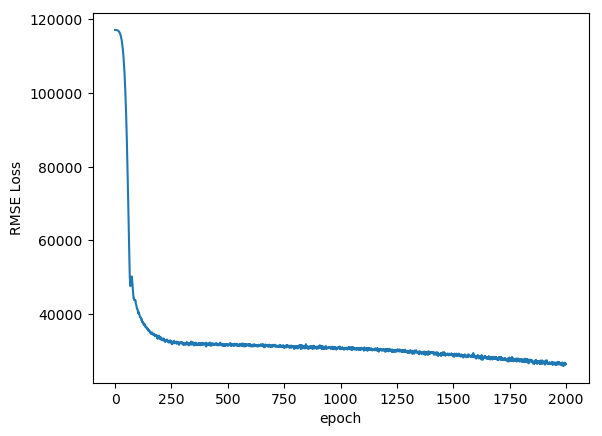

In [295]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

<h1>Walidacja modelu</h1>

In [296]:
with torch.no_grad():
    y_val = model(categories_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 34972.54687500


In [297]:
for i in range(len(y_test)):
    print(f'{i}. PREDICTED: {y_val[i].item():10.2f} REAL: {y_test[i].item():10.2f}')

0. PREDICTED:  100469.27 REAL:  135000.00
1. PREDICTED:  143344.69 REAL:  210000.00
2. PREDICTED:  142907.14 REAL:  210000.00
3. PREDICTED:   37208.52 REAL:   86703.00
4. PREDICTED:  110789.38 REAL:  150075.00
5. PREDICTED:   82014.80 REAL:   91000.00
6. PREDICTED:  137562.58 REAL:  150000.00
7. PREDICTED:  114519.68 REAL:   90000.00
8. PREDICTED:  107216.52 REAL:  116150.00
9. PREDICTED:  174462.55 REAL:  189650.00
10. PREDICTED:   66959.12 REAL:   20171.00
11. PREDICTED:  117515.43 REAL:  106000.00
12. PREDICTED:   90963.93 REAL:   43331.00
13. PREDICTED:  126122.96 REAL:  140000.00
14. PREDICTED:   49100.73 REAL:   59102.00
15. PREDICTED:  135084.86 REAL:  205300.00
16. PREDICTED:   62723.59 REAL:   62726.00
17. PREDICTED:   88114.02 REAL:   70000.00
18. PREDICTED:   92583.74 REAL:   58894.00
19. PREDICTED:   65668.99 REAL:   69999.00
20. PREDICTED:   76605.68 REAL:   40570.00
21. PREDICTED:   23156.13 REAL:   21669.00
22. PREDICTED:  190128.61 REAL:  100800.00
23. PREDICTED:  16077